<a href="https://colab.research.google.com/github/MehetayManzur/BracU-Course-Resources/blob/main/Customer_Segmentation_Analysis_%26_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the train data
df = pd.read_csv('/content/sample_data/18.csv')

# Looking top 10 rows
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [ ]:
# Number of features
num_features = df.shape[1]

print("Number of features (columns):", num_features)



Number of features (columns): 11


In [ ]:
# Number of data points (rows)
num_data_points = df.shape[0]

print("Number of data points (rows):", num_data_points)


Number of data points (rows): 8068


In [ ]:
# Check data types of each feature
print(df.dtypes)

# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

Categorical Features: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
Numerical Features: ['ID', 'Age', 'Work_Experience', 'Family_Size']


In [ ]:
df.shape

(8068, 11)

In [ ]:
# Checking the number of missing values in each column
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [ ]:
# Check number of duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [ ]:
# Removing all those rows
df = df.loc[df.isnull().sum(axis=1)<3]

In [ ]:
# Looking random 10 rows of the data
df.sample(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7697,464699,Male,No,29,No,Doctor,1.0,Low,5.0,Cat_4,D
4660,463449,Male,Yes,25,No,Healthcare,1.0,Average,2.0,Cat_6,D
5214,466402,Male,Yes,40,Yes,Artist,0.0,Average,4.0,Cat_6,B
5112,464172,Male,Yes,60,Yes,Artist,3.0,High,3.0,Cat_6,B
3326,460494,Female,No,28,No,Marketing,1.0,Low,4.0,Cat_3,D
4770,466264,Male,Yes,33,Yes,NaN,0.0,Low,2.0,Cat_3,D
1163,466798,Male,No,23,No,Healthcare,4.0,Low,5.0,Cat_6,D
1317,460340,Female,No,46,Yes,Artist,10.0,Low,2.0,Cat_6,A
6967,465744,Male,Yes,51,Yes,Artist,0.0,Average,2.0,Cat_2,C
3290,465038,Male,Yes,46,No,Executive,0.0,High,4.0,Cat_6,A


data splitting

In [ ]:
#Selecting numerical features
numerical_data = df.select_dtypes(include='number').copy() # Use .copy() to avoid SettingWithCopyWarning

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 4 numerical features: 

['ID', 'Age', 'Work_Experience', 'Family_Size']


In [ ]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object').copy()

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 7 categorical features: 

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']


descriptive analysis

statistics of numerical features

In [ ]:
# Transposed stats for numerical features
display(numerical_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
ID,8049.0,463481.549012,2595.221174,458982.0,461244.0,463476.0,465746.0,467974.0
Age,8049.0,43.458442,16.704328,18.0,30.0,40.0,53.0,89.0
Work_Experience,7236.0,2.642758,3.407044,0.0,0.0,1.0,4.0,14.0
Family_Size,7729.0,2.850175,1.531523,1.0,2.0,3.0,4.0,9.0


summary statistics of categorical features

In [ ]:
# Transposed stats for categorical features
display(categorical_data.describe().T)

,count,unique,top,freq
Gender,8049,2,Male,4409
Ever_Married,7915,2,Yes,4635
Graduated,7977,2,Yes,4965
Profession,7936,9,Artist,2515
Spending_Score,8049,3,Low,4869
Var_1,7977,7,Cat_6,5232
Segmentation,8049,4,D,2261


Variance of each numerical features

In [ ]:
numerical_data.var()

,0
ID,6.735173e+06
Age,2.790346e+02
Work_Experience,1.160795e+01
Family_Size,2.345562e+00


Skewness

In [ ]:
numerical_data.skew()

,0
ID,0.001153
Age,0.696344
Work_Experience,1.305672
Family_Size,1.011150



Histograms and Box Plot

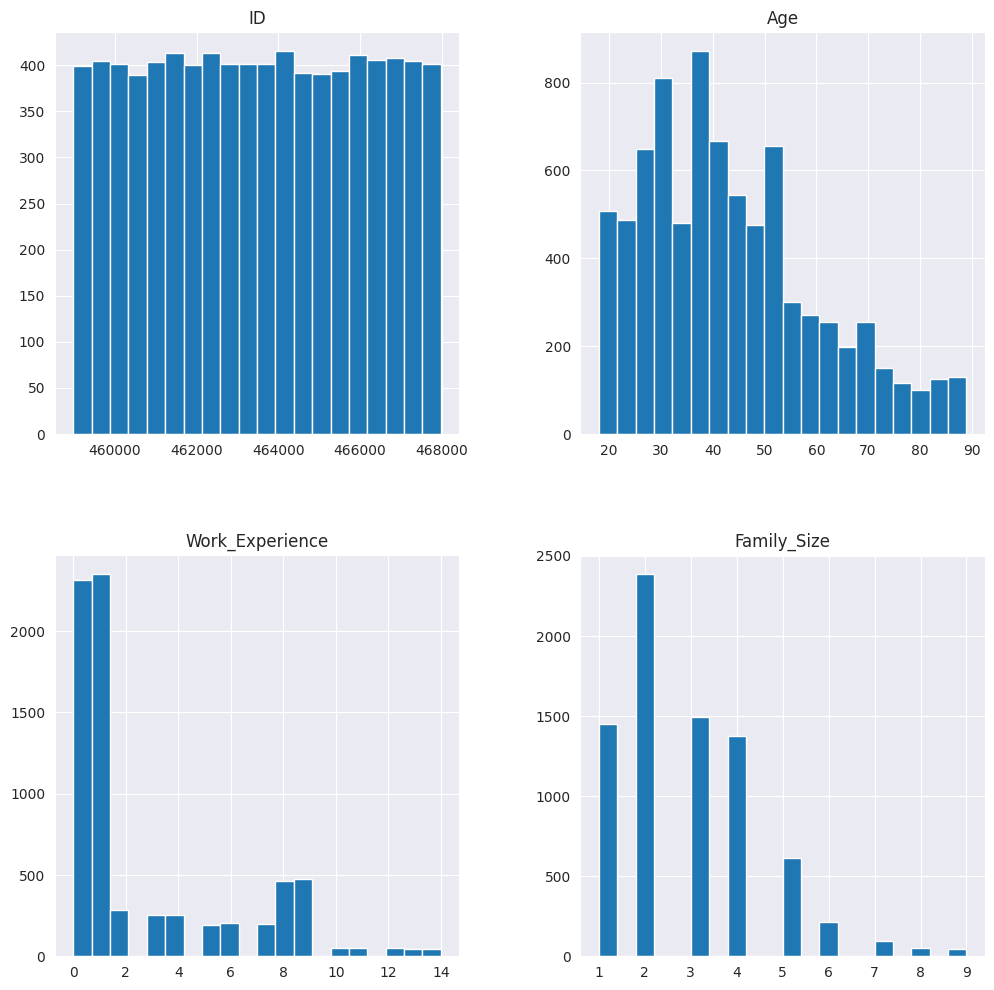

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

Density Graph

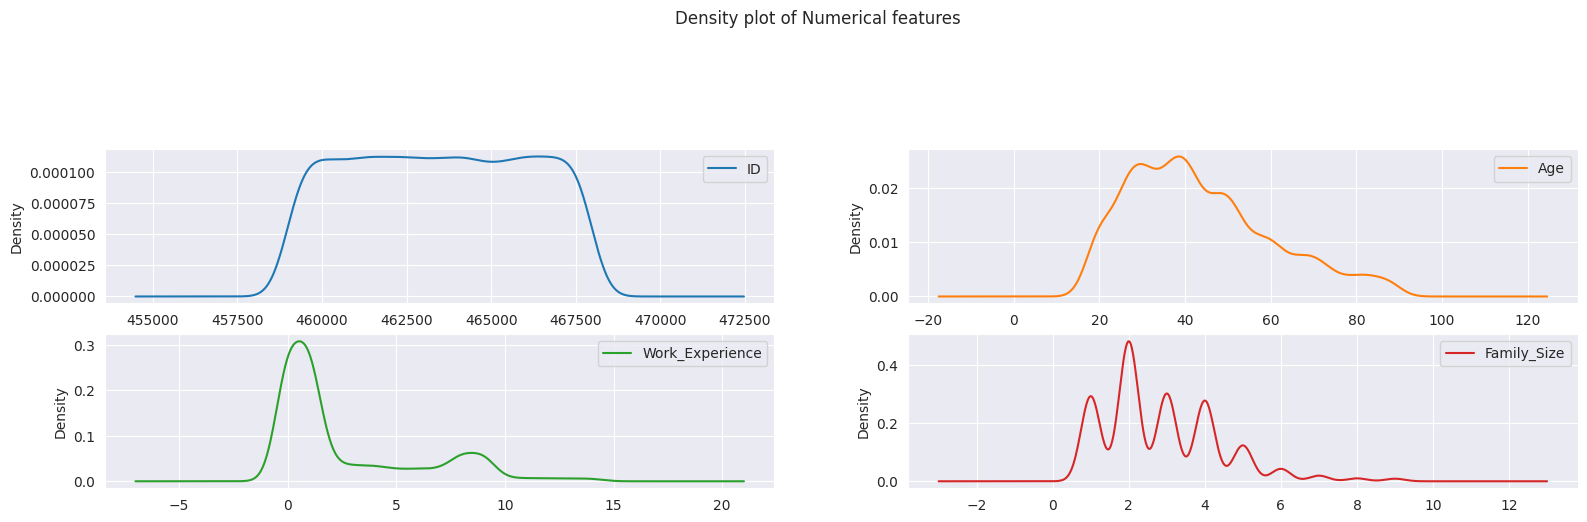

In [ ]:
numerical_data = df.select_dtypes(include= 'number')
numerical_data.plot(kind='density',figsize=(19,14),subplots=True,layout=(6,2),title="Density plot of Numerical features", sharex = False)
plt.show()

Box Plot

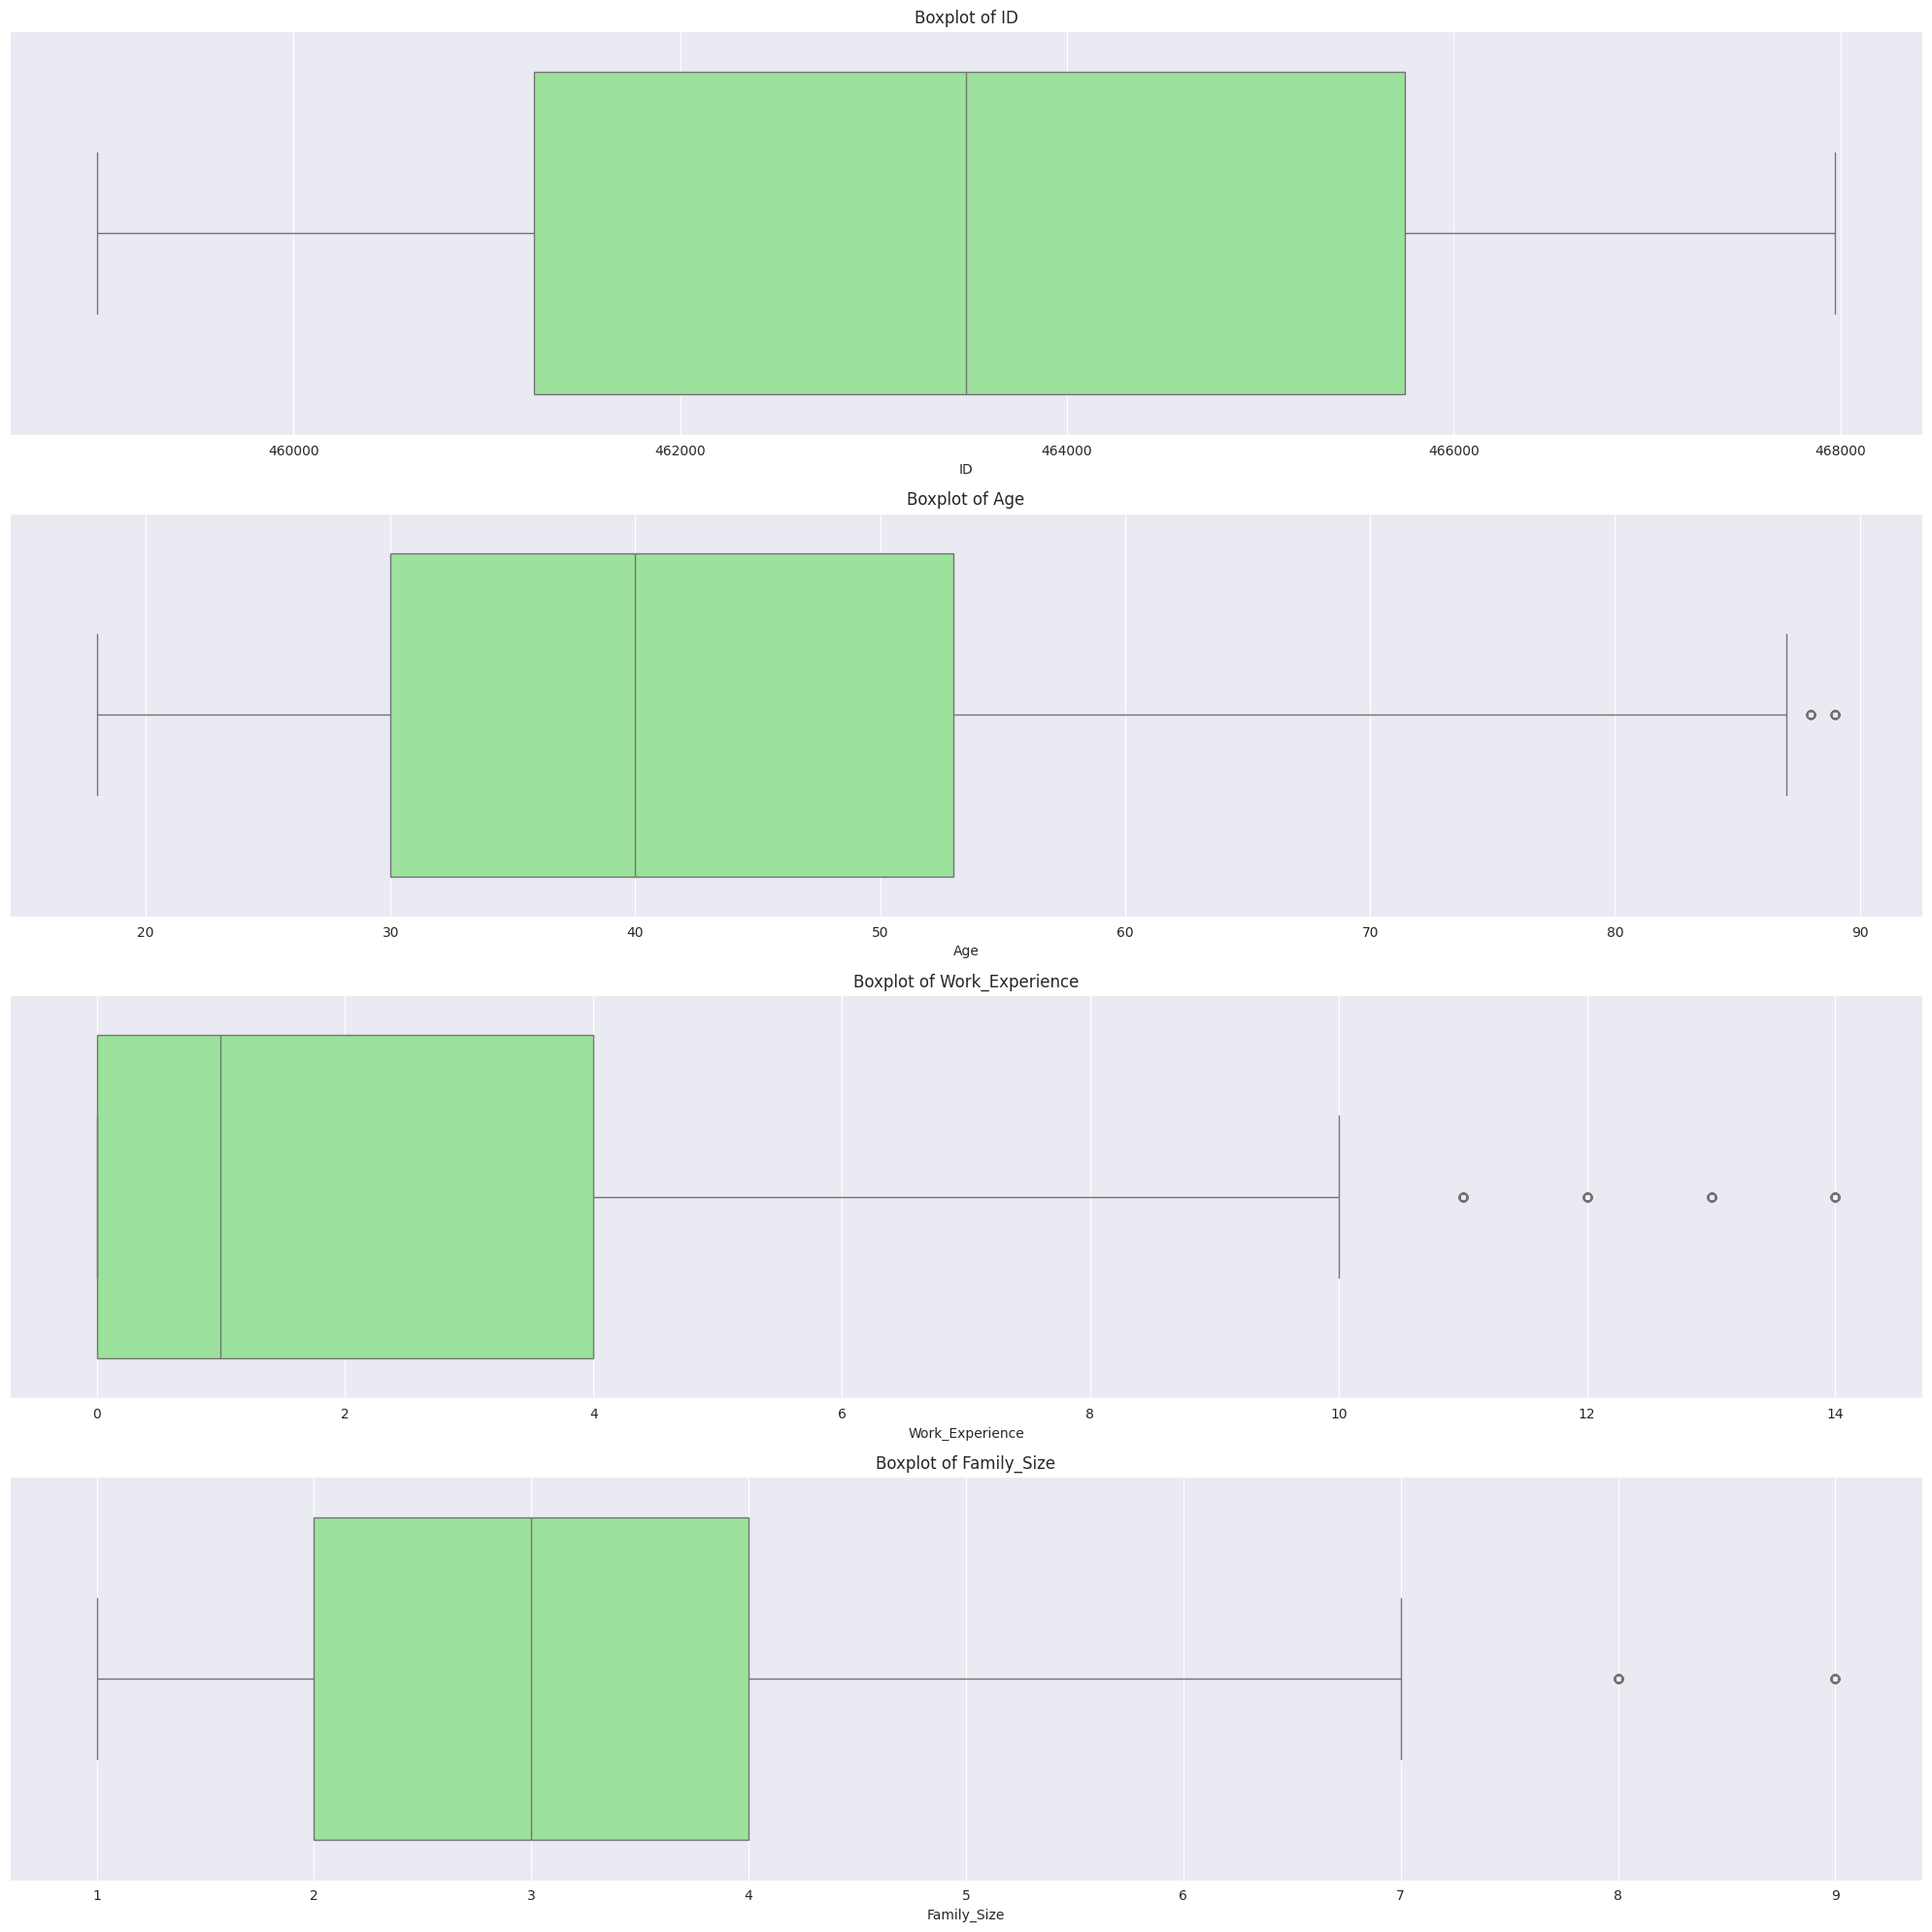

In [ ]:
box = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(box, 1):
    plt.subplot(len(box), 1, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()
plt.show()

Data Distribution of Output Column

In [ ]:
class_counts = df['Segmentation'].value_counts()
print(class_counts)

Segmentation
D    2261
C    1968
A    1965
B    1855
Name: count, dtype: int64


In [ ]:
!pip install imbalanced-learn

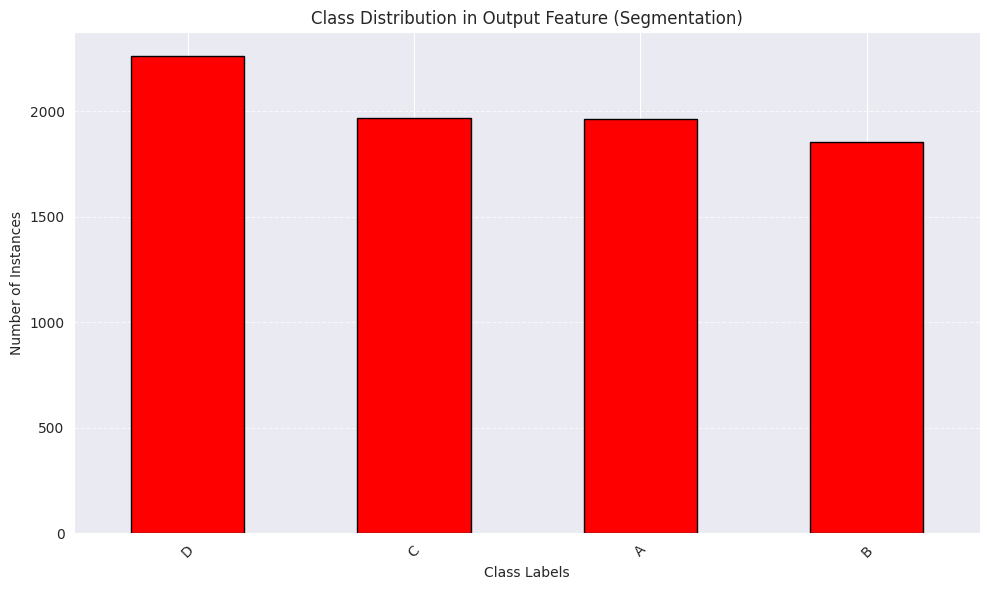

In [ ]:
class_counts = df['Segmentation'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Class Distribution in Output Feature (Segmentation)')
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

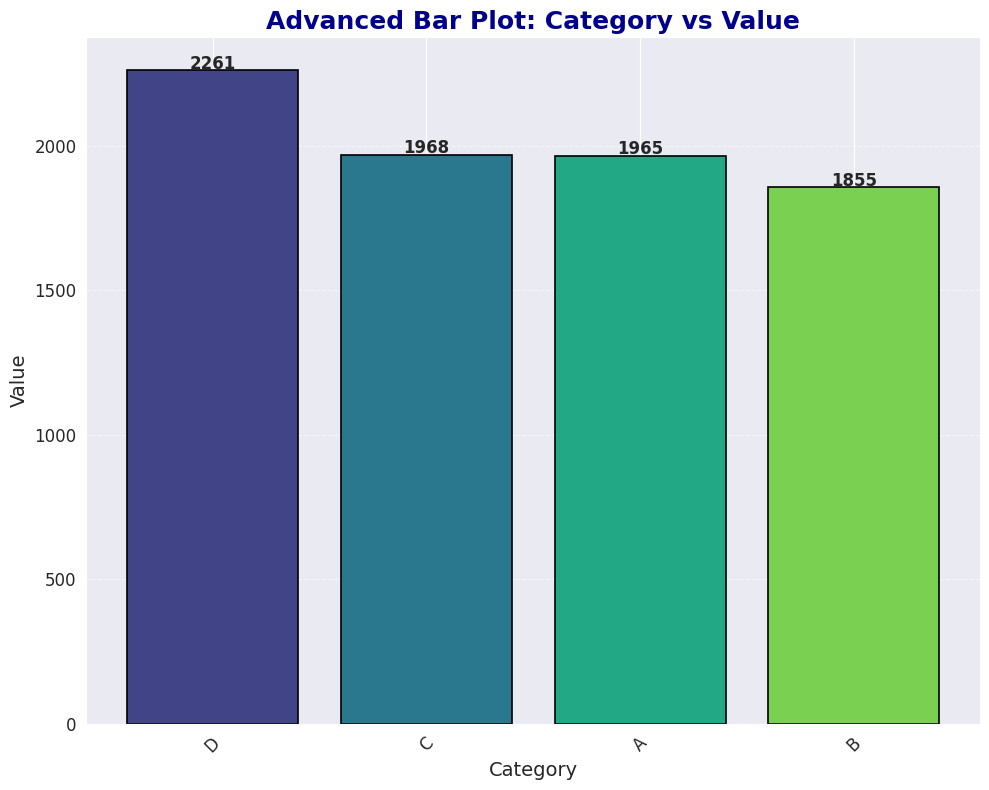

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

counts = df['Segmentation'].value_counts()
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(counts)))

plt.figure(figsize=(10, 8))
bars = plt.bar(counts.index, counts.values, color=colors, edgecolor='black', linewidth=1.2)
plt.title('Advanced Bar Plot: Category vs Value', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}', ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig("count.png", dpi=300, bbox_inches='tight')
plt.show()

COUNT | UNIQUE | TOP | FREQUENCY

In [ ]:
categorical_DATA = df.select_dtypes(include = 'object')
categorical_DATA.describe().T

,count,unique,top,freq
Gender,8049,2,Male,4409
Ever_Married,7915,2,Yes,4635
Graduated,7977,2,Yes,4965
Profession,7936,9,Artist,2515
Spending_Score,8049,3,Low,4869
Var_1,7977,7,Cat_6,5232
Segmentation,8049,4,D,2261


Total NULL Values of Each Columns

In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,134
Age,0
Graduated,72
Profession,113
Work_Experience,813
Spending_Score,0
Family_Size,320
Var_1,72


In [ ]:
NULL = df.isnull().sum().sum()
print(f"Total NULL Values: {NULL}")

Total NULL Values: 1524


Replace The NULL Values With The Highest Frequency Data For Object Datatype

In [ ]:
for i in df.select_dtypes(include="object").columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

Number Unique values in each feature

In [ ]:
numerical_data.nunique()

,0
ID,8049
Age,67
Work_Experience,15
Family_Size,9


Missing Values

In [ ]:
numerical_data.isnull().sum()

,0
ID,0
Age,0
Work_Experience,813
Family_Size,320


No. of unique values in each categorical feature

Barplot of unique value counts in every categorical features

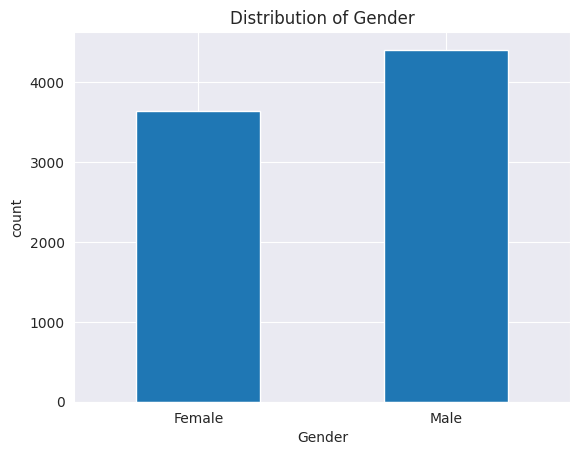

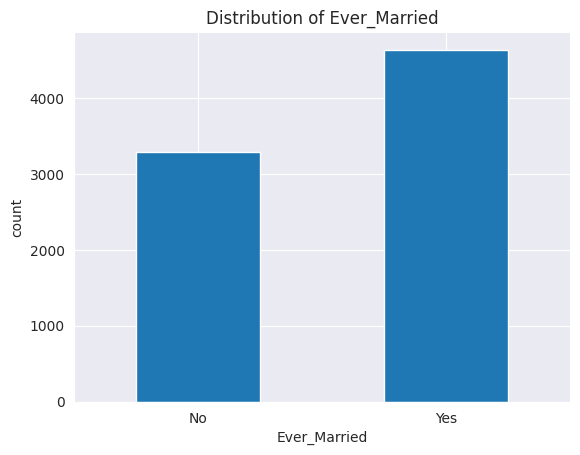

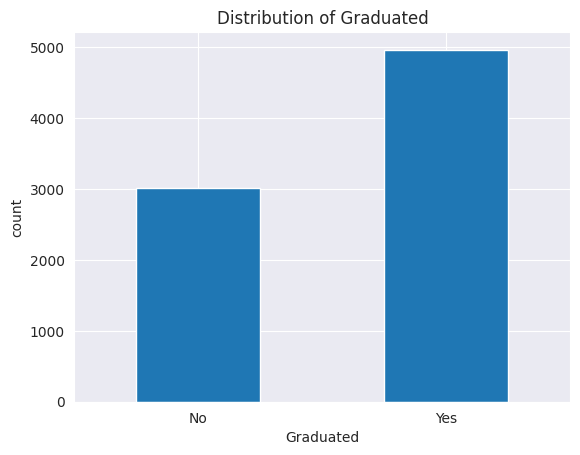

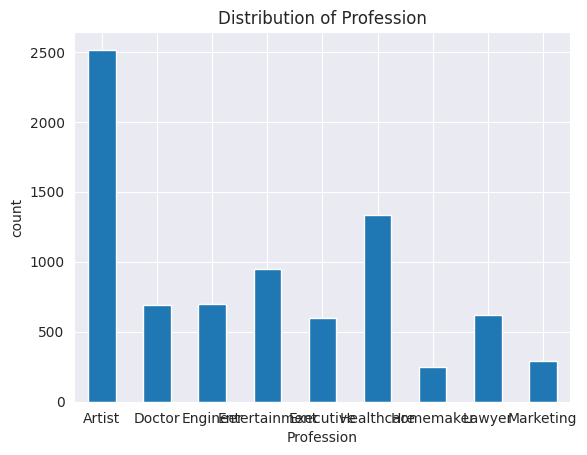

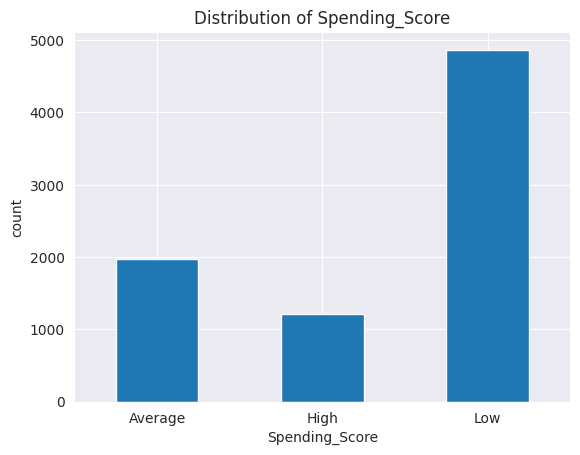

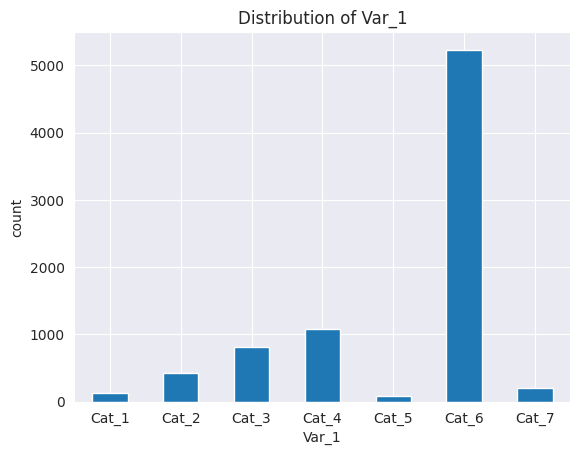

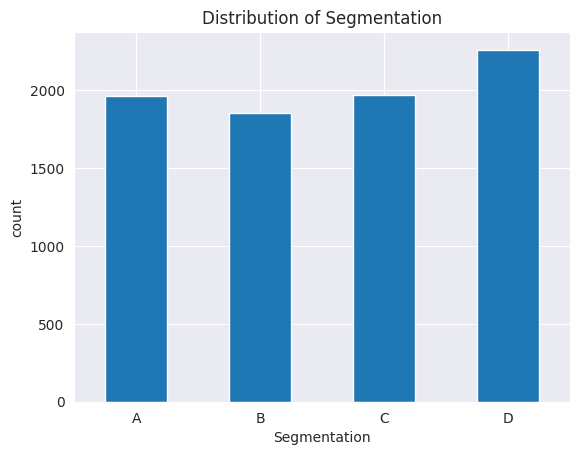

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

Correlation Analysis

matrix of dataset

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
display(correlation_matrix)

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.003879,-0.030649,0.011652
Age,-0.003879,1.000000,-0.190627,-0.280499
Work_Experience,-0.030649,-0.190627,1.000000,-0.063234
Family_Size,0.011652,-0.280499,-0.063234,1.000000


Correlation Heatmap of dataset

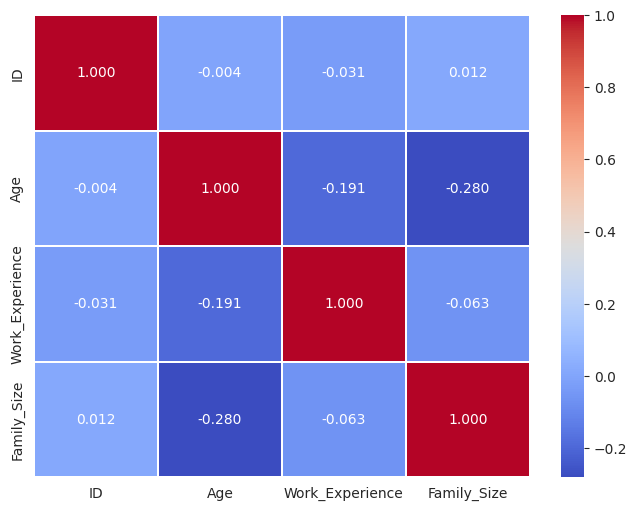

In [ ]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

In [ ]:
# Checking the count of null values
df.Var_1.isnull().sum()

np.int64(0)

In [ ]:
print('The count of each category\n',df.Var_1.value_counts())

The count of each category
 Var_1
Cat_6    5304
Cat_4    1084
Cat_3     820
Cat_2     422
Cat_7     201
Cat_1     133
Cat_5      85
Name: count, dtype: int64


In [ ]:
# Filling the missing values
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'No'),"Var_1"] = 'Cat_4'
df.loc[ (pd.isnull(df["Var_1"])) & ((df['Profession'] == 'Lawyer') | (df['Profession'] == 'Artist')),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df["Var_1"])) & (df['Age'] > 40),"Var_1"] = 'Cat_6'

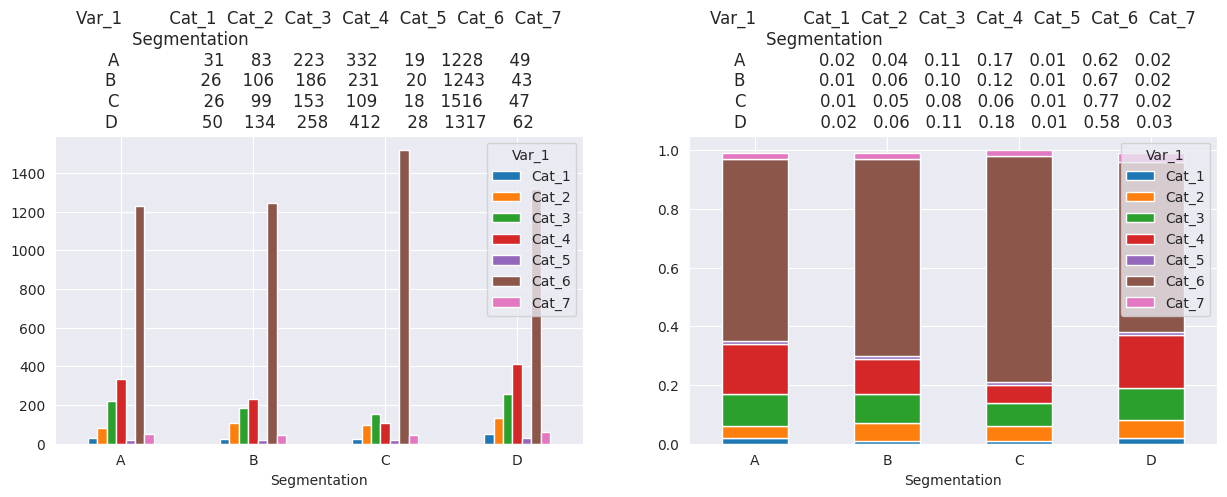

In [ ]:
# Counting Var_1 in each segment
ax1 = df.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = df.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [ ]:
print('The count of gender\n',df.Gender.value_counts())

The count of gender
 Gender
Male      4409
Female    3640
Name: count, dtype: int64


In [ ]:
# Checking the count of missing values
df.Gender.isnull().sum()

np.int64(0)

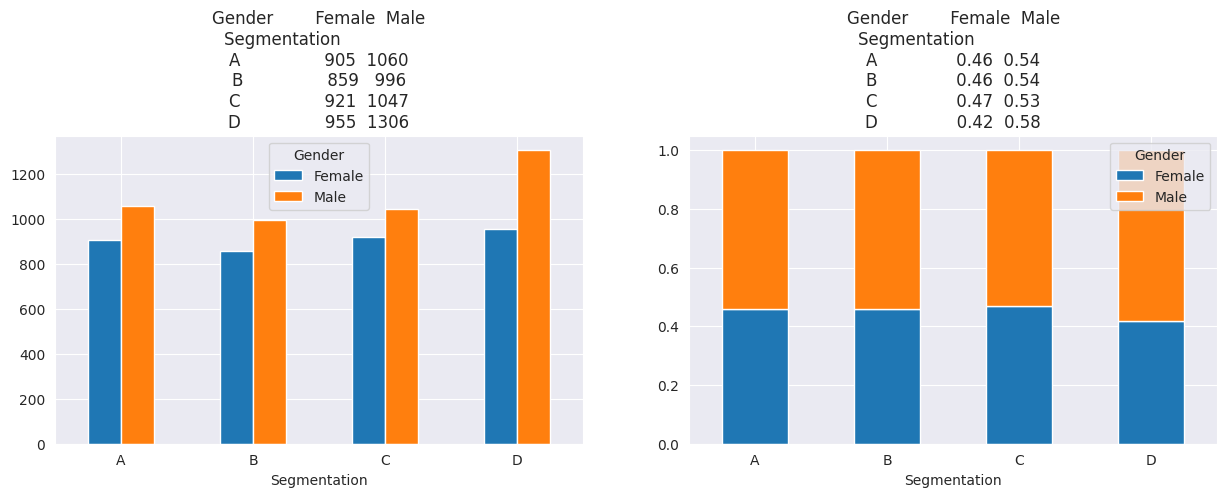

In [ ]:
# Counting male-female in each segment
ax1 = df.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = df.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [ ]:
print('Count of married vs not married\n',df.Ever_Married.value_counts())

Count of married vs not married
 Ever_Married
Yes    4769
No     3280
Name: count, dtype: int64


In [ ]:
# Checking the count of missing values
df.Ever_Married.isnull().sum()

np.int64(0)

In [ ]:
# Filling the missing values
df.loc[ (pd.isnull(df["Ever_Married"])) & ((df['Spending_Score'] == 'Average') | (df['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Age'] > 40),"Ever_Married"] = 'Yes'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'

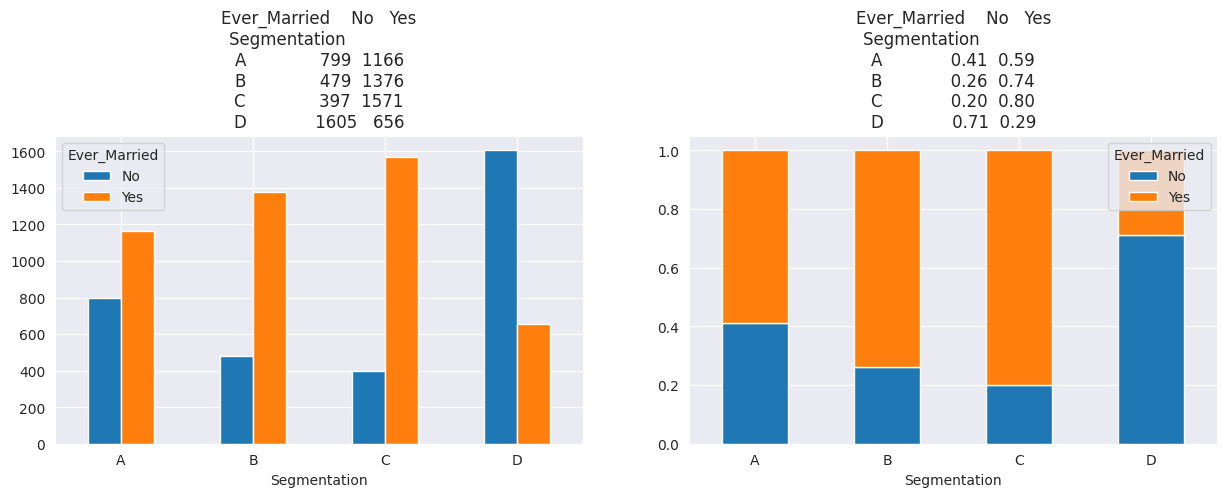

In [ ]:
# Counting married and non-married in each segment
ax1 = df.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

# Percentage of married and non-married in each segment
ax2 = df.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [ ]:
df.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Age
count,8049.000000
mean,43.458442
std,16.704328
min,18.000000
25%,30.000000
50%,40.000000
75%,53.000000
90%,69.000000
95%,77.000000
99%,87.000000


In [ ]:
# Checking the count of missing values
df.Age.isnull().sum()

np.int64(0)

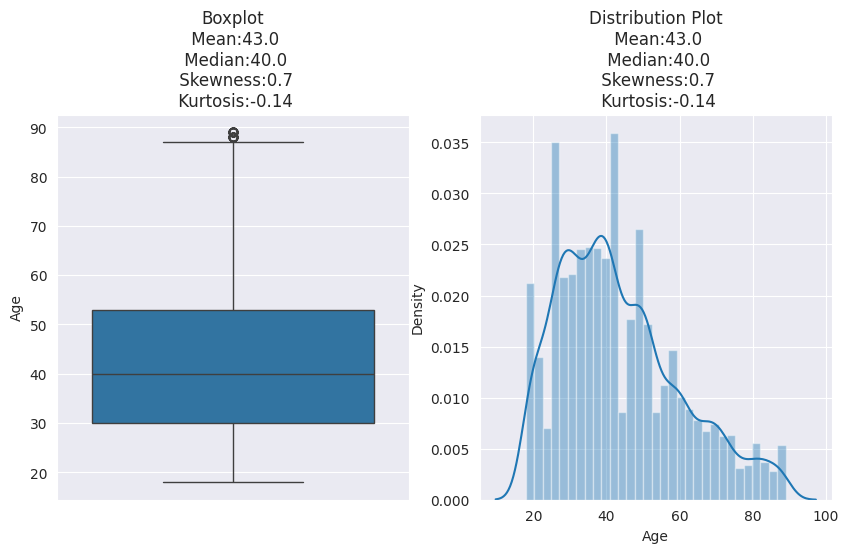

In [ ]:
# Looking the distribution of column Age
plt.figure(figsize=(10,5))

skewness = round(df.Age.skew(),2)
kurtosis = round(df.Age.kurtosis(),2)
mean = round(np.mean(df.Age),0)
median = np.median(df.Age)

plt.subplot(1,2,1)
sns.boxplot(y=df.Age)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df.Age)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

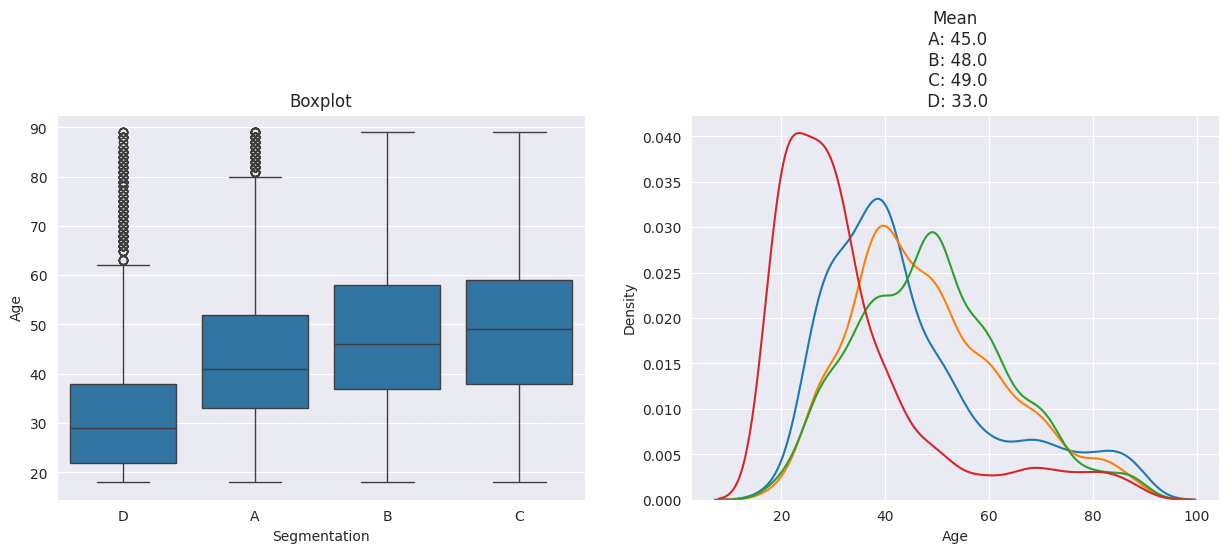

In [ ]:
# Looking the distribution
a = df[df.Segmentation =='A']["Age"]
b = df[df.Segmentation =='B']["Age"]
c = df[df.Segmentation =='C']["Age"]
d = df[df.Segmentation =='D']["Age"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Age")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [ ]:
# Converting the datatype from float to int
df['Age'] = df['Age'].astype(int)

In [ ]:
df.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Age
count,8049.000000
mean,43.458442
std,16.704328
min,18.000000
25%,30.000000
50%,40.000000
75%,53.000000
90%,69.000000
95%,77.000000
99%,87.000000


In [ ]:
# Divide people in the 4 age group
df['Age_Bin'] = pd.cut(df.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])

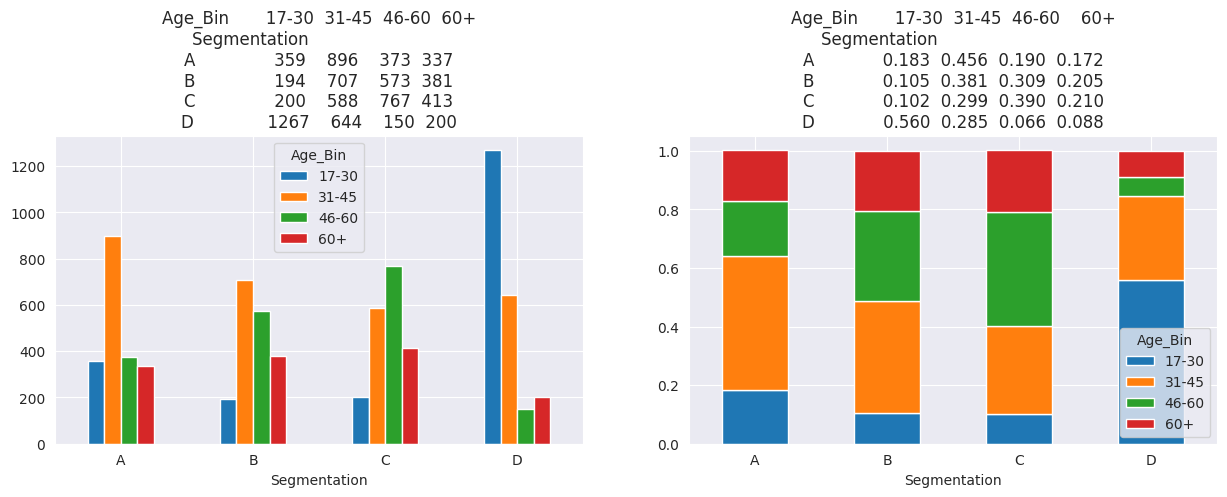

In [ ]:
# Counting different age group in each segment
ax1 = df.groupby(["Segmentation"])["Age_Bin"].value_counts().unstack().round(3)

# Percentage of age bins in each segment
ax2 = df.pivot_table(columns='Age_Bin',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [ ]:
print('Count of each graduate and non-graduate\n',df.Graduated.value_counts())

Count of each graduate and non-graduate
 Graduated
Yes    5037
No     3012
Name: count, dtype: int64


In [ ]:
# Checking the count of missing values
df.Graduated.isnull().sum()

np.int64(0)

In [ ]:
# Filling the missing
df.loc[ (pd.isnull(df["Graduated"])) & (df['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Profession'] == 'Artist'),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Age'] > 49),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Var_1'] == 'Cat_4'),"Graduated"] = 'No'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'



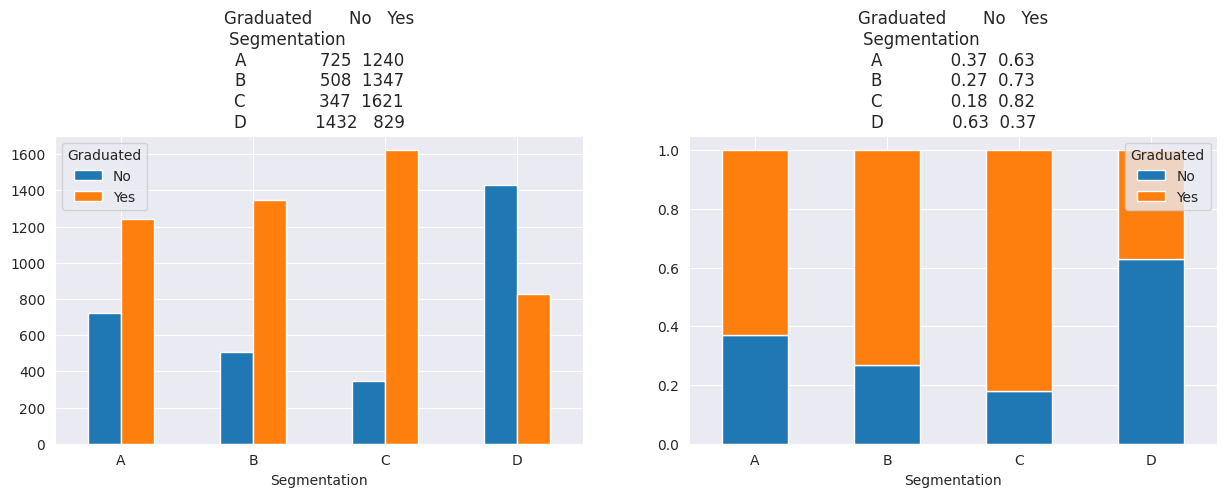

In [ ]:
# Counting graduate and non-graduate in each segment
ax1 = df.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = df.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [ ]:
print('Count of each profession\n',df.Profession.value_counts())

Count of each profession
 Profession
Artist           2628
Healthcare       1331
Entertainment     949
Engineer          699
Doctor            688
Lawyer            619
Executive         598
Marketing         291
Homemaker         246
Name: count, dtype: int64


In [ ]:
# Checking the count of missing values
df.Profession.isnull().sum()

np.int64(0)

In [ ]:
# Filling the missing values
df.loc[ (pd.isnull(df["Profession"])) & (df['Work_Experience'] > 8),"Profession"] = 'Homemaker'
df.loc[ (pd.isnull(df["Profession"])) & (df['Age'] > 70),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Family_Size'] < 3),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Graduated'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'High'),"Profession"] = 'Executives'

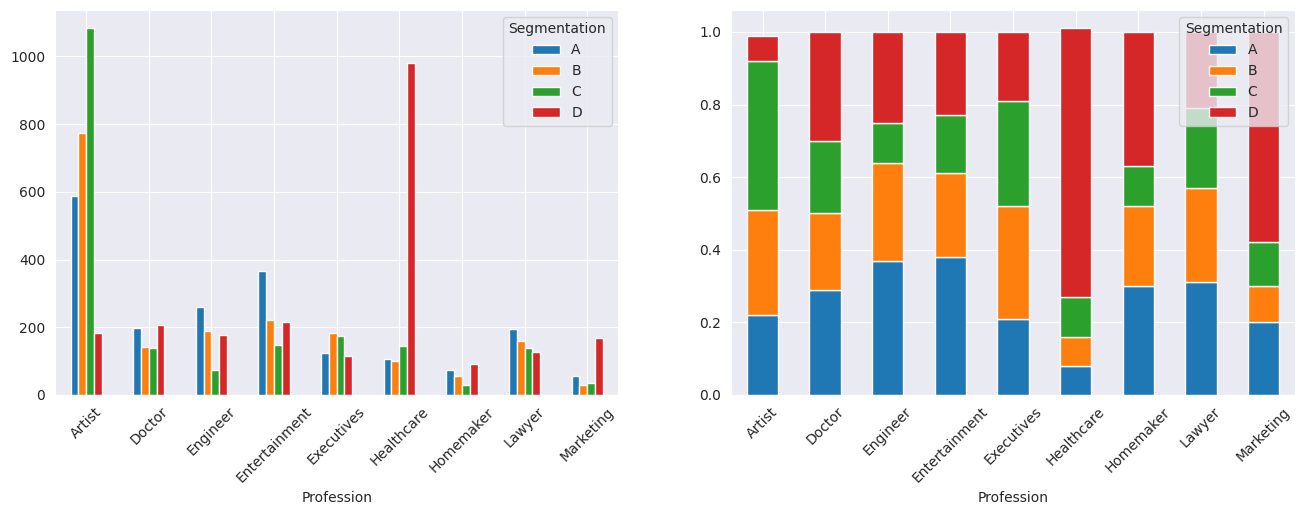

In [ ]:
# Count of segments in each profession
ax1 = df.groupby(["Profession"])["Segmentation"].value_counts().unstack().round(3)

# Percentage of segments in each profession
ax2 = df.pivot_table(columns='Segmentation',index='Profession',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (16,5))
label = ['Artist','Doctor','Engineer','Entertainment','Executives','Healthcare','Homemaker','Lawyer','Marketing']
ax[0].set_xticklabels(labels = label,rotation = 45)

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (16,5))
ax[1].set_xticklabels(labels = label,rotation = 45)

plt.show()

In [ ]:
df.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Work_Experience
count,7236.000000
mean,2.642758
std,3.407044
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
90%,8.000000
95%,9.000000
99%,13.000000


In [ ]:
# Checking the count of missing values
df.Work_Experience.isnull().sum()

np.int64(813)

In [ ]:
# Filling NaN with previous values
df['Work_Experience'] = df['Work_Experience'].fillna(method='pad')

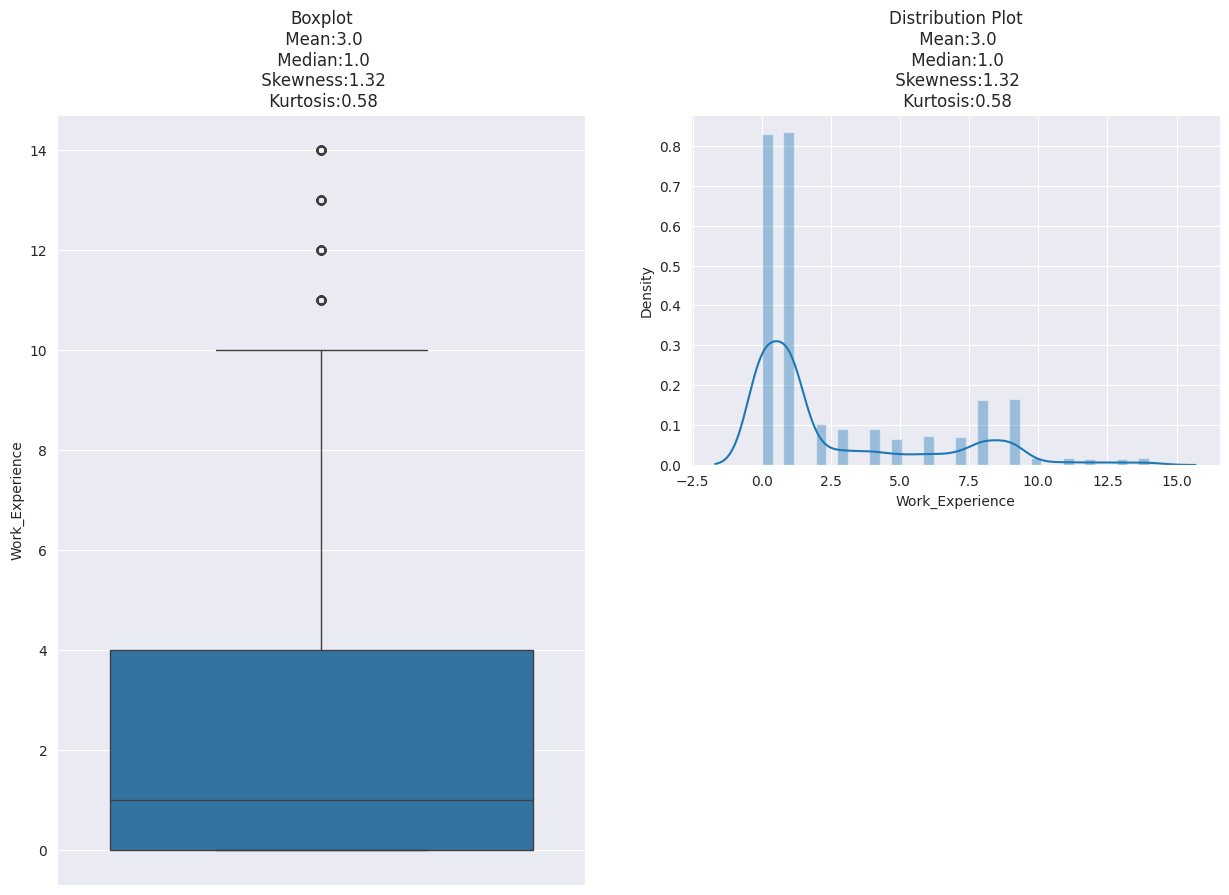

In [ ]:
# Looking the distribution
plt.figure(figsize=(15,10))

skewness = round(df.Work_Experience.skew(),2)
kurtosis = round(df.Work_Experience.kurtosis(),2)
mean = round(np.mean(df.Work_Experience),0)
median = np.median(df.Work_Experience)

plt.subplot(1,2,1)
sns.boxplot(y=df.Work_Experience)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df.Work_Experience)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

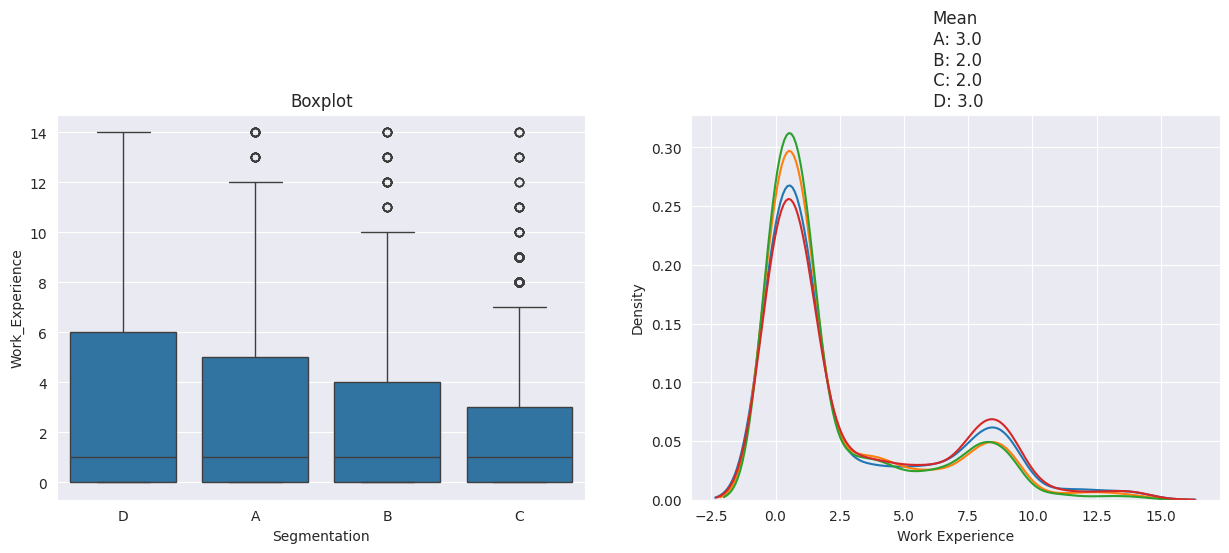

In [ ]:
# Looking the distribution
a = df[df.Segmentation =='A']["Work_Experience"]
b = df[df.Segmentation =='B']["Work_Experience"]
c = df[df.Segmentation =='C']["Work_Experience"]
d = df[df.Segmentation =='D']["Work_Experience"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Work_Experience")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [ ]:
# Changing the data type
df['Work_Experience'] = df['Work_Experience'].astype(int)

In [ ]:
df.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Work_Experience
count,8049.000000
mean,2.617965
std,3.394392
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
90%,8.000000
95%,9.000000
99%,13.000000


In [ ]:
# Dividing the people into 3 category of work experience
df['Work_Exp_Category'] = pd.cut(df.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])

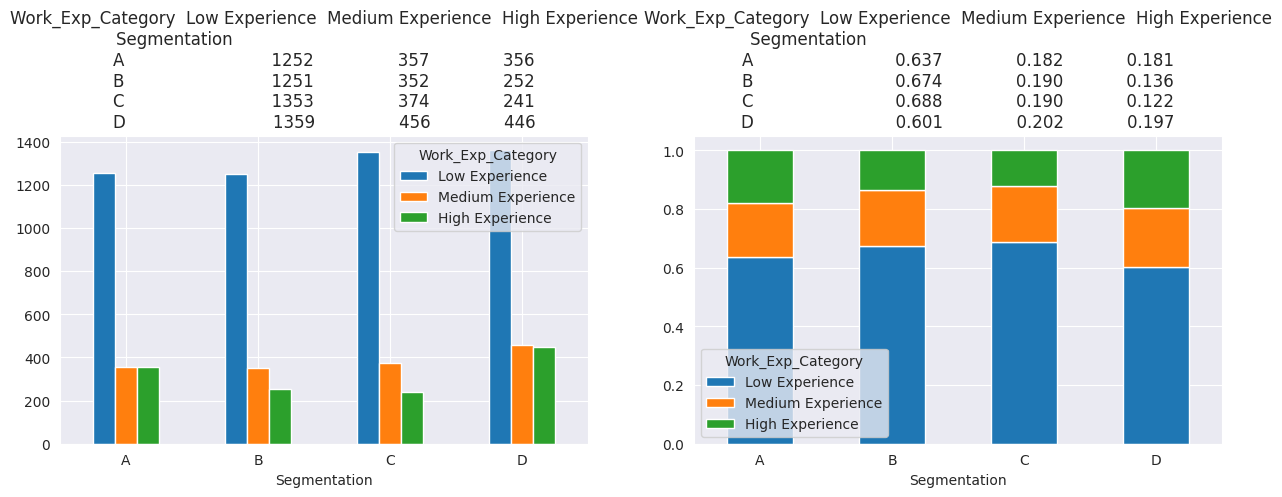

In [ ]:
# Counting different category of work experience in each segment
ax1 = df.groupby(["Segmentation"])["Work_Exp_Category"].value_counts().unstack().round(3)

# Percentage of work experience in each segment
ax2 = df.pivot_table(columns='Work_Exp_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [ ]:
print('Count of spending score\n',df.Spending_Score.value_counts())

Count of spending score
 Spending_Score
Low        4869
Average    1970
High       1210
Name: count, dtype: int64


In [ ]:
# Checking the count of missing values
df.Spending_Score.isnull().sum()

np.int64(0)

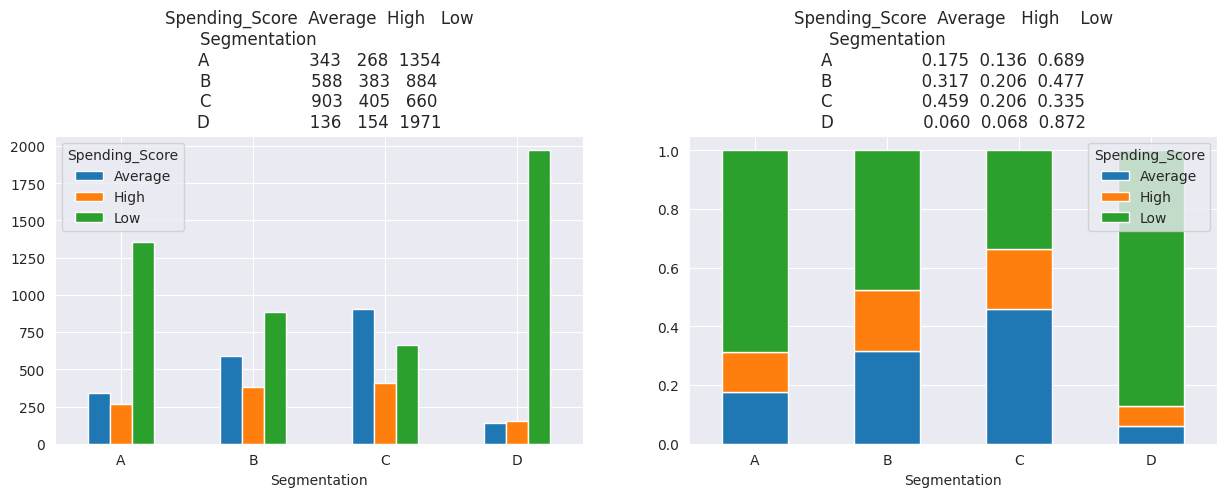

In [ ]:
# Counting different category of spending score in each segment
ax1 = df.groupby(["Segmentation"])["Spending_Score"].value_counts().unstack().round(3)

# Percentage of spending score in each segment
ax2 = df.pivot_table(columns='Spending_Score',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [ ]:
df.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Family_Size
count,7729.000000
mean,2.850175
std,1.531523
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
90%,5.000000
95%,6.000000
99%,8.000000


In [ ]:
# Checking the count of missing values
df.Family_Size.isnull().sum()

np.int64(320)

In [ ]:
# Filling the missing values
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Graduated'] == 'Yes'),"Family_Size"] = 2.0

# Fill remaining NaN with previous values
df['Family_Size'] = df['Family_Size'].fillna(method='pad')

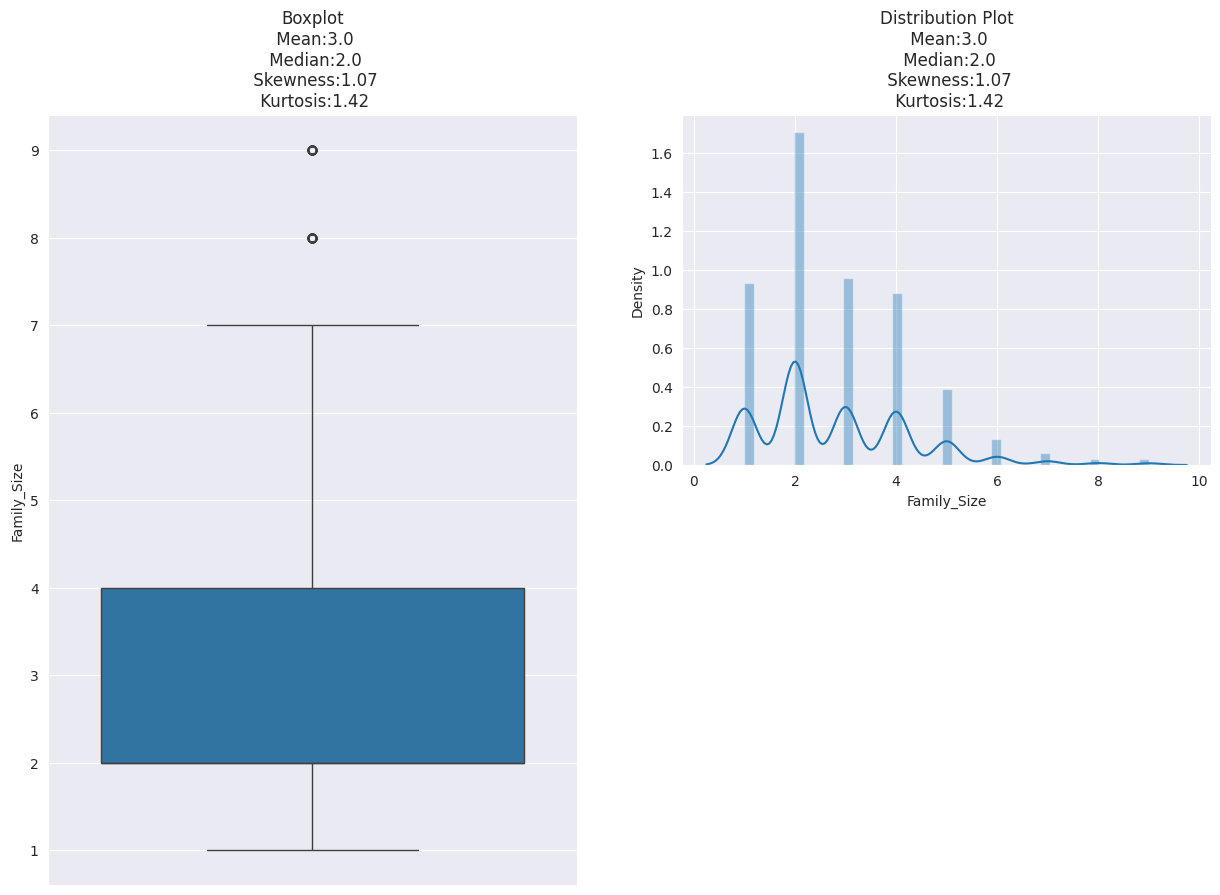

In [ ]:
# Looking the distribution
plt.figure(figsize=(15,10))

skewness = round(df.Family_Size.skew(),2)
kurtosis = round(df.Family_Size.kurtosis(),2)
mean = round(np.mean(df.Family_Size),0)
median = np.median(df.Family_Size)

plt.subplot(1,2,1)
sns.boxplot(y=df.Family_Size)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df.Family_Size)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

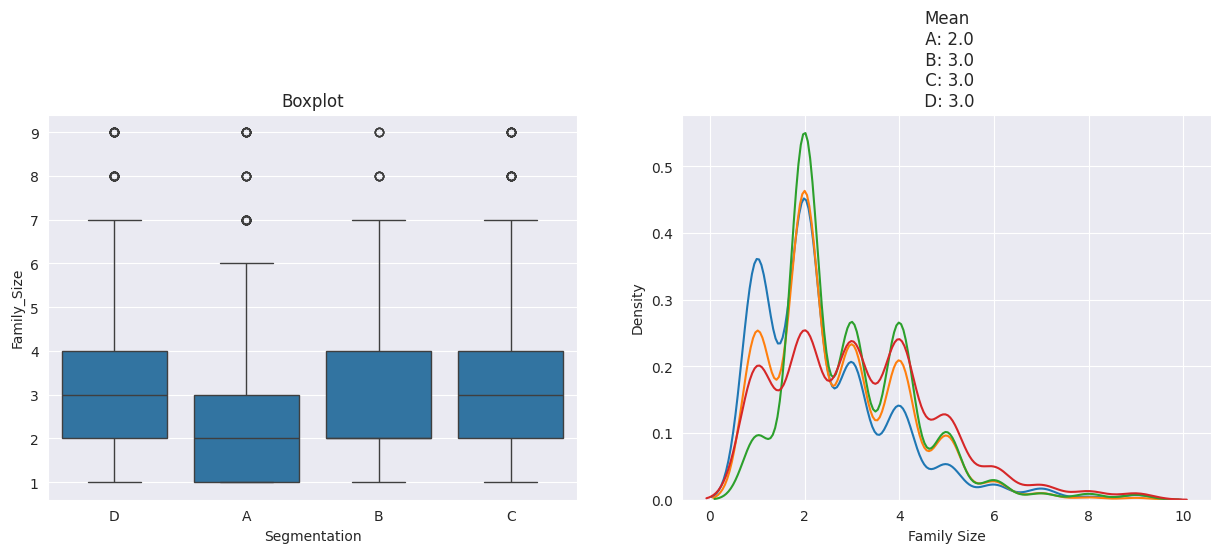

In [ ]:
# Looking the distribution
b = df[df.Segmentation =='B']["Family_Size"]
c = df[df.Segmentation =='C']["Family_Size"]
d = df[df.Segmentation =='D']["Family_Size"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Family_Size")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [ ]:
# Filling the missing values w.r.t other attributes underlying pattern df.loc[ (pd.isnull(df["Graduated"])) & (df['Spending_Score'] == 'Average'),"Graduated"] = 'Yes' df.loc[ (pd.isnull(df["Graduated"])) & (df['Profession'] == 'Artist'),"Graduated"] = 'Yes' df.loc[ (pd.isnull(df["Graduated"])) & (df['Age'] > 49),"Graduated"] = 'Yes' df.loc[ (pd.isnull(df["Graduated"])) & (df['Var_1'] == 'Cat_4'),"Graduated"] = 'No' df.loc[ (pd.isnull(df["Graduated"])) & (df['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes' # Replacing remaining NaN with previous values df['Graduated'] = df['Graduated'].fillna(method='pad')

In [ ]:
df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].median()).astype(int)

In [ ]:
df.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Family_Size
count,8049.000000
mean,2.820226
std,1.513806
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
90%,5.000000
95%,6.000000
99%,8.000000


In [ ]:
# Divide family size into 3 category
df['Family_Size_Category'] = pd.cut(df.Family_Size,bins=[0,4,6,10],labels=['Small Family','Big Family','Joint Family'])

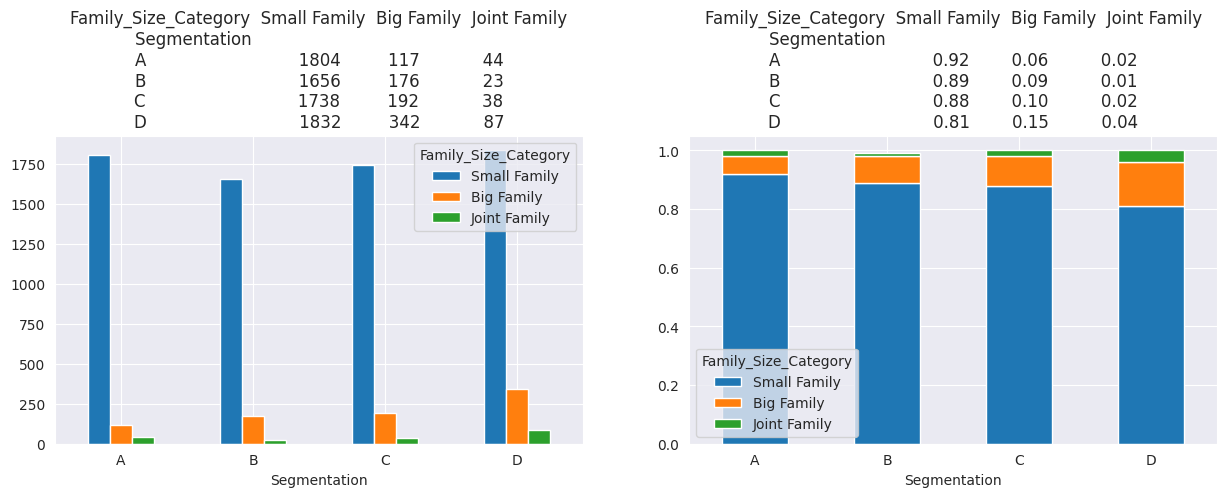

In [ ]:
# Counting different category
ax1 = df.groupby(["Segmentation"])["Family_Size_Category"].value_counts().unstack().round(3)

# Percentage of family size in each segment
ax2 = df.pivot_table(columns='Family_Size_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [ ]:
print('Count of each category of segmentation\n',df.Segmentation.value_counts())

Count of each category of segmentation
 Segmentation
D    2261
C    1968
A    1965
B    1855
Name: count, dtype: int64


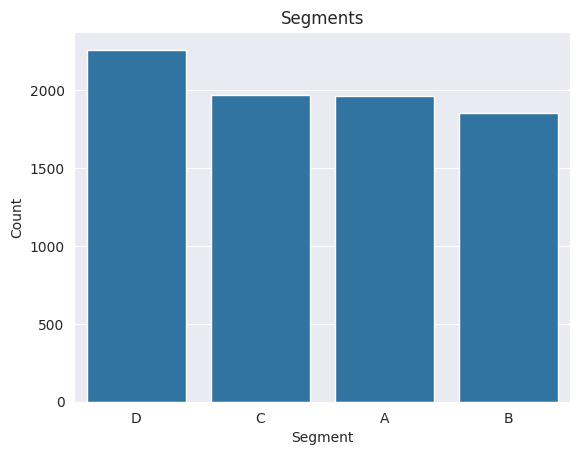

In [ ]:
segments = df.loc[:,"Segmentation"].value_counts()
plt.xlabel("Segment")
plt.ylabel('Count')
sns.barplot(x=segments.index , y=segments.values).set_title('Segments')
plt.show()

In [ ]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    8049 non-null   int64   
 1   Gender                8049 non-null   object  
 2   Ever_Married          8049 non-null   object  
 3   Age                   8049 non-null   int64   
 4   Graduated             8049 non-null   object  
 5   Profession            8049 non-null   object  
 6   Work_Experience       8049 non-null   int64   
 7   Spending_Score        8049 non-null   object  
 8   Family_Size           8049 non-null   int64   
 9   Var_1                 8049 non-null   object  
 10  Segmentation          8049 non-null   object  
 11  Age_Bin               8049 non-null   category
 12  Work_Exp_Category     8049 non-null   category
 13  Family_Size_Category  8049 non-null   category
dtypes: category(3), int64(4), object(7)
memory usage: 715.9+

In [ ]:
# number of unique ids
df.ID.nunique()

8049

In [ ]:
# Check null values column-wise
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
ID                      0
Gender                  0
Ever_Married            0
Age                     0
Graduated               0
Profession              0
Work_Experience         0
Spending_Score          0
Family_Size             0
Var_1                   0
Segmentation            0
Age_Bin                 0
Work_Exp_Category       0
Family_Size_Category    0
dtype: int64


Removing irrelevant features

In [ ]:
# Drop irrelevant columns
df = df.drop(['ID', 'Var_1'], axis=1)

Encoding Categorical Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                8049 non-null   object  
 1   Ever_Married          8049 non-null   object  
 2   Age                   8049 non-null   int64   
 3   Graduated             8049 non-null   object  
 4   Profession            8049 non-null   object  
 5   Work_Experience       8049 non-null   int64   
 6   Spending_Score        8049 non-null   object  
 7   Family_Size           8049 non-null   int64   
 8   Segmentation          8049 non-null   object  
 9   Age_Bin               8049 non-null   category
 10  Work_Exp_Category     8049 non-null   category
 11  Family_Size_Category  8049 non-null   category
dtypes: category(3), int64(3), object(6)
memory usage: 590.1+ KB


In [ ]:
# Transform the Segmentation column
segment_enc = pd.get_dummies(df['Segmentation'])

# Take a look at the encoded columns
segment_enc.head()

,A,B,C,D
0,False,False,False,True
1,True,False,False,False
2,False,True,False,False
3,False,True,False,False
4,True,False,False,False


In [ ]:
df['Segmentation'].head()

,Segmentation
0,D
1,A
2,B
3,B
4,A


In [ ]:
# Now you can perform the previous operations
y = df['Segmentation']
X = df.drop('Segmentation', axis=1)



Feature Scaling(Standard Scalar)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numeric columns only
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check the transformed data
print(df.head())


   Gender Ever_Married       Age Graduated     Profession  Work_Experience  \
0    Male           No -1.284684        No     Healthcare        -0.476688   
1  Female          Yes -0.326788       Yes       Engineer        -0.476688   
2  Female          Yes  1.409396       Yes       Engineer        -0.476688   
3    Male          Yes  1.409396       Yes         Lawyer        -0.771310   
4  Female          Yes -0.207052       Yes  Entertainment        -0.771310   

  Spending_Score  Family_Size Segmentation Age_Bin Work_Exp_Category  \
0            Low     0.779391            D   17-30    Low Experience   
1        Average     0.118764            A   31-45    Low Experience   
2            Low    -1.202492            B     60+    Low Experience   
3           High    -0.541864            B     60+    Low Experience   
4           High     2.100647            A   31-45    Low Experience   

  Family_Size_Category  
0         Small Family  
1         Small Family  
2         Small Family 

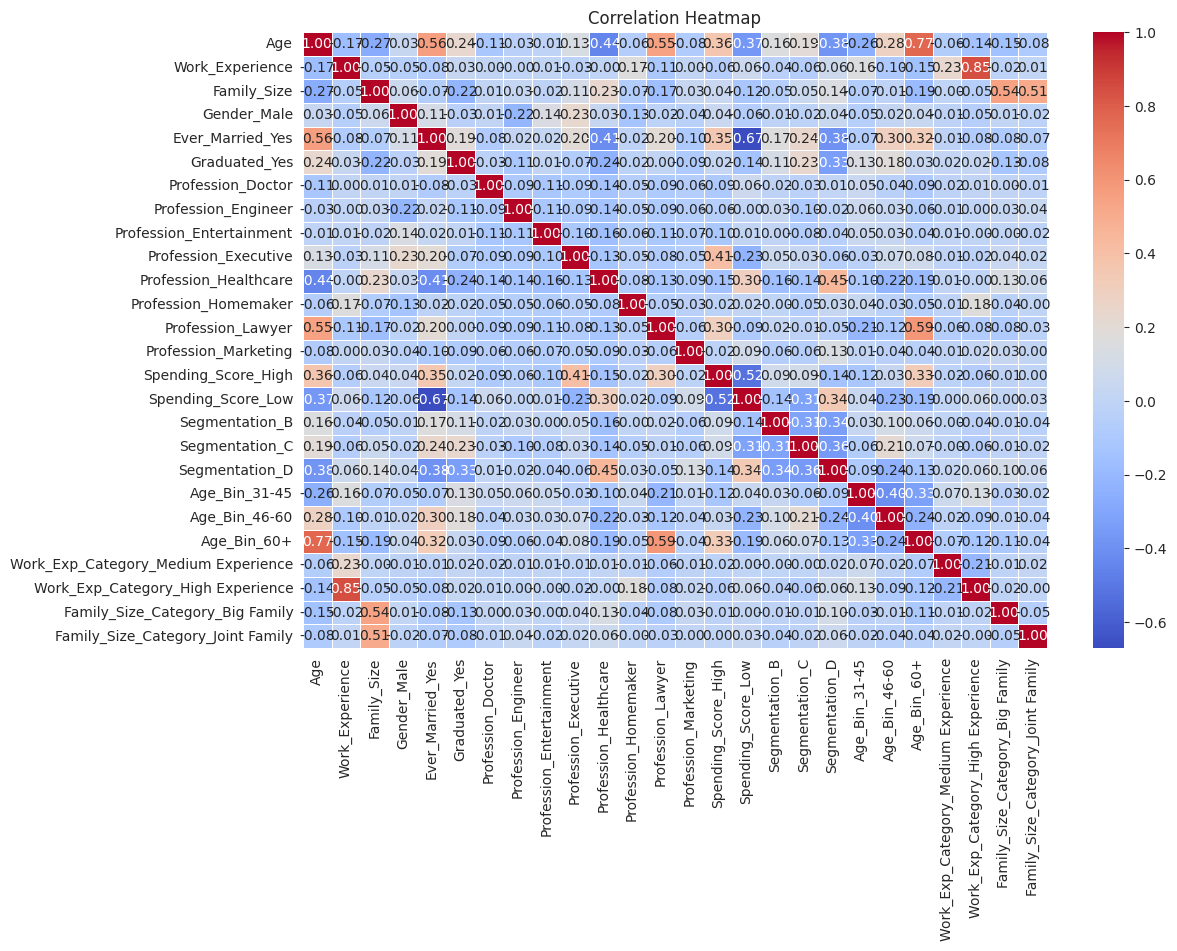

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df_encoded.corr()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Segmentation_B,Segmentation_C,Segmentation_D,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Work_Exp_Category_Medium Experience,Work_Exp_Category_High Experience,Family_Size_Category_Big Family,Family_Size_Category_Joint Family
Age,1.000000,-0.171508,-0.271876,0.029720,0.557380,0.235702,-0.114086,-0.031628,-0.009919,0.130150,...,0.155436,0.193478,-0.377088,-0.255589,0.278392,0.768988,-0.064791,-0.143924,-0.151445,-0.083353
Work_Experience,-0.171508,1.000000,-0.051816,-0.052040,-0.082767,0.029826,0.002597,-0.002984,0.008235,-0.025758,...,-0.036534,-0.062269,0.063100,0.155412,-0.096270,-0.152472,0.233812,0.849240,-0.019054,0.008480
Family_Size,-0.271876,-0.051816,1.000000,0.057160,-0.069930,-0.221418,0.005779,0.027298,-0.015880,0.108758,...,-0.050579,0.050567,0.142162,-0.069305,-0.006827,-0.192586,-0.000903,-0.052314,0.544603,0.506952
Gender_Male,0.029720,-0.052040,0.057160,1.000000,0.111602,-0.034621,0.006370,-0.215303,0.136358,0.226950,...,-0.011922,-0.018011,0.037485,-0.053789,0.019830,0.039588,-0.012072,-0.052557,0.014794,-0.019911
Ever_Married_Yes,0.557380,-0.082767,-0.069930,0.111602,1.000000,0.188409,-0.077445,0.016023,0.022518,0.199273,...,0.166260,0.238238,-0.384592,-0.072903,0.301051,0.318097,-0.011478,-0.077954,-0.084102,-0.067536
Graduated_Yes,0.235702,0.029826,-0.221418,-0.034621,0.188409,1.000000,-0.028048,-0.112528,0.008059,-0.067768,...,0.113487,0.232633,-0.334695,0.133769,0.180272,0.031147,0.015607,0.024875,-0.126437,-0.084380
Profession_Doctor,-0.114086,0.002597,0.005779,0.006370,-0.077445,-0.028048,1.000000,-0.094280,-0.111771,-0.086610,...,-0.016417,-0.029174,0.012594,0.047142,-0.043452,-0.090628,-0.017569,0.006419,0.003382,-0.009934
Profession_Engineer,-0.031628,-0.002984,0.027298,-0.215303,0.016023,-0.112528,-0.094280,1.000000,-0.112745,-0.087365,...,0.029235,-0.098449,-0.019978,0.056157,0.025326,-0.064826,-0.011950,0.000646,0.027870,0.035638
Profession_Entertainment,-0.009919,0.008235,-0.015880,0.136358,0.022518,0.008059,-0.111771,-0.112745,1.000000,-0.103573,...,0.002095,-0.075323,-0.044211,0.052219,0.031373,-0.043479,0.007394,-0.003863,-0.004448,-0.019282
Profession_Executive,0.130150,-0.025758,0.108758,0.226950,0.199273,-0.067768,-0.086610,-0.087365,-0.103573,1.000000,...,0.050828,0.031731,-0.055846,-0.028391,0.069179,0.077931,-0.010047,-0.024771,0.041438,0.024015


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/sample_data/18.csv')

# Clean column names (remove extra spaces if any)
df.columns = df.columns.str.strip()


# If you need encoding
df_encoded = pd.get_dummies(df.drop('Segmentation', axis=1), drop_first=True)

# Add back the target column
df_encoded['Segmentation'] = df['Segmentation']

# Define features and target
X = df_encoded.drop('Segmentation', axis=1)
y = df_encoded['Segmentation']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Save splits into CSV (optional)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)




In [ ]:
# Check column names of df_encoded
print(df_encoded.columns)


Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Gender_Male',
       'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7', 'Segmentation'],
      dtype='object')


Train Test Split with Train set

In [ ]:
X_train.shape, X_test.shape

((6454, 23), (1614, 23))

In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1614, 23)
y_test shape: (1614,)


Text(0, 0.5, 'no of segmentation')

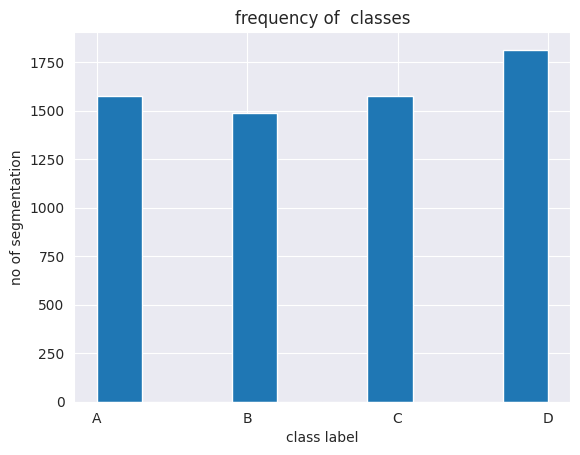

In [ ]:
fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of segmentation')

Standardization

In [ ]:
# Find categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')


In [ ]:
# Check the data types of the columns
print(df.dtypes)


ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('/content/sample_data/18.csv')

# Clean column names
df.columns = df.columns.str.strip()


# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Segmentation
if 'Segmentation' in df.columns:
    df['Segmentation'] = le.fit_transform(df['Segmentation'])
else:
    print(" Column 'Segmentation' not found!")

# Encode 'Work_Experience
if 'Work_Experience' in df.columns:
    df['Work_Experience'] = le.fit_transform(df['Work_Experience'])
else:
    print(" Column 'Work_Experience' not found!")

# Encode 'Family_Size' if it exists
if 'Family_Size' in df.columns:
    df['Family_Size'] = le.fit_transform(df['Family_Size'])
else:
    print(" Column 'Family_Size' not found!")




In [ ]:
# Features (X) and target (y)
X = df.drop('Segmentation', axis=1)
y = df['Segmentation']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('/content/sample_data/18.csv')
df.columns = df.columns.str.strip()

# Encode target column
le = LabelEncoder()
df['Segmentation'] = le.fit_transform(df['Segmentation'])

# Encode all categorical features automatically
df_encoded = pd.get_dummies(df.drop('Segmentation', axis=1), drop_first=True)

# Define features and target
X = df_encoded
y = df['Segmentation']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale only numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Prepare the data
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Initialize the LabelEncoder for binary features
le = LabelEncoder()

# Encode binary/ordinal categorical columns
df['Gender'] = le.fit_transform(df['Gender'])
df['Ever_Married'] = le.fit_transform(df['Ever_Married'])
df['Graduated'] = le.fit_transform(df['Graduated'])

# Use One-Hot Encoding for nominal categorical columns
df = pd.get_dummies(df, columns=['Profession', 'Spending_Score', 'Var_1'], drop_first=True)



In [ ]:
# Define features (X) and target (y)
X = df.drop('Segmentation', axis=1)
y = df['Segmentation']


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(units=len(y.unique()), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])




In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2498 - loss: nan - val_accuracy: 0.2423 - val_loss: nan
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2401 - loss: nan - val_accuracy: 0.2423 - val_loss: nan
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2418 - loss: nan - val_accuracy: 0.2423 - val_loss: nan
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2416 - loss: nan - val_accuracy: 0.2423 - val_loss: nan
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2407 - loss: nan - val_accuracy: 0.2423 - val_loss: nan
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2499 - loss: nan - val_accuracy: 0.2423 - val_loss: nan
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2468 - loss: nan - val_accuracy: 0.2423 - val_loss: nan
Epoch 8/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2498 - loss: nan - val_accuracy: 0.2423 - val_loss: nan
Epoch 9/50
202/202 ━━━━━

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on the test set
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)  # Convert probabilities to class labels

# Print classification report
print(classification_report(y_test, y_pred_nn_classes))


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2458 - loss: nan
Test Accuracy: 24.23%
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.24      1.00      0.39       391
           1       0.00      0.00      0.00       369
           2       0.00      0.00      0.00       380
           3       0.00      0.00      0.00       474

    accuracy                           0.24      1614
   macro avg       0.06      0.25      0.10      1614
weighted avg       0.06      0.24      0.09      1614



In [ ]:
#Naive Bayes with imputation + scaling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

#  Impute
imp = SimpleImputer(strategy="mean")
X_train_imp = imp.fit_transform(X_train)
X_test_imp  = imp.transform(X_test)

# Check for NaNs
assert not np.isnan(X_train_imp).any() and not np.isnan(X_test_imp).any(), "NaNs remain after imputation."

# 2) Scale
scaler = StandardScaler()
X_train_scaled_nb = scaler.fit_transform(X_train_imp)
X_test_scaled_nb  = scaler.transform(X_test_imp)

# 3) Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled_nb, y_train)

# 4) Evaluate
y_pred_nb = nb_model.predict(X_test_scaled_nb)
print(f"Naive Bayes Test Accuracy: {accuracy_score(y_test, y_pred_nb)*100:.2f}%")
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Test Accuracy: 46.72%
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       391
           1       0.34      0.14      0.19       369
           2       0.40      0.66      0.50       380
           3       0.65      0.63      0.64       474

    accuracy                           0.47      1614
   macro avg       0.45      0.46      0.43      1614
weighted avg       0.46      0.47      0.45      1614



In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
# Define features (X) and target (y)
X = df.drop('Segmentation', axis=1)
y = df['Segmentation']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Initialize the imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in both training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# After imputing, scale the data again
scaler = StandardScaler()

# Scale the imputed data
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')

# Train the model
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for precision, recall, and F1-score
print(classification_report(y_test, y_pred_log_reg))


Accuracy: 49.50%
              precision    recall  f1-score   support

           0       0.39      0.48      0.43       391
           1       0.38      0.14      0.20       369
           2       0.45      0.60      0.52       380
           3       0.66      0.70      0.68       474

    accuracy                           0.50      1614
   macro avg       0.47      0.48      0.46      1614
weighted avg       0.48      0.50      0.47      1614



Silhouette Score: 0.11


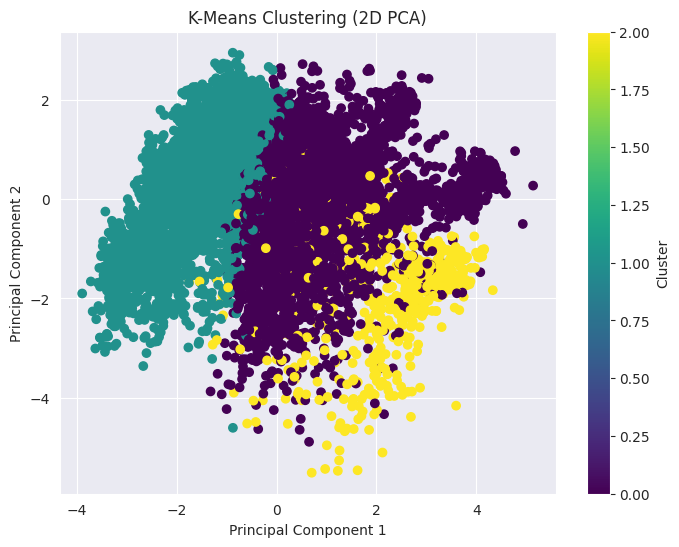

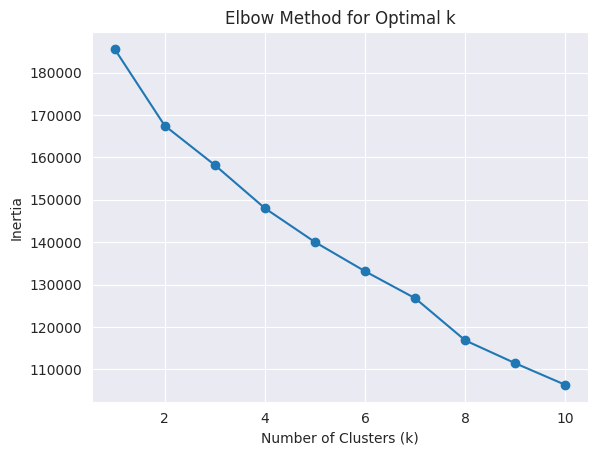

In [ ]:
#Unsupervise

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 2. Define features (X) by dropping the target column 'Segmentation'
X = df_imputed.drop('Segmentation', axis=1)

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply K-Means clustering (choose 3 clusters for simplicity)
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred_kmeans = kmeans.fit_predict(X_scaled)

# 5. Add the predicted cluster labels to the dataset
df_imputed['Cluster'] = y_pred_kmeans

# 6. Calculate Silhouette Score
sil_score = silhouette_score(X_scaled, y_pred_kmeans)
print(f"Silhouette Score: {sil_score:.2f}")

# 7. Apply PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 8. Plot the clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmeans, cmap='viridis')
plt.title('K-Means Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# 9. Elbow Method to find the optimal k
inertia = []
k_range = range(1, 11)  # Try k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 10. Plot the Elbow curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


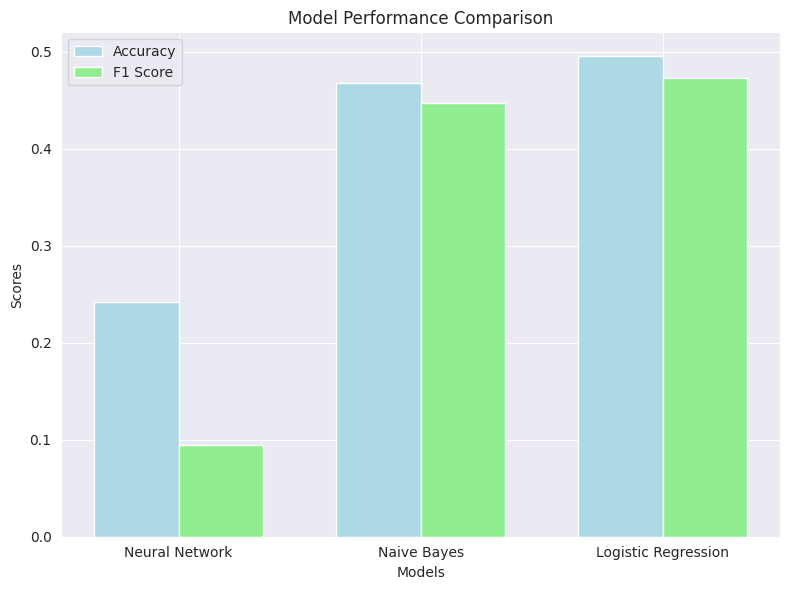

In [ ]:
#graph
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

models = ['Neural Network', 'Naive Bayes', 'Logistic Regression']
accuracy = []
f1 = []

y_pred_nn_classes = y_pred_nn.argmax(axis=1)


accuracy.append(test_accuracy)
f1.append(f1_score(y_test, y_pred_nn_classes, average='weighted'))

accuracy.append(accuracy_score(y_test, y_pred_nb))
f1.append(f1_score(y_test, y_pred_nb, average='weighted'))


accuracy.append(accuracy_score(y_test, y_pred_log_reg))
f1.append(f1_score(y_test, y_pred_log_reg, average='weighted'))

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))


ax.bar(x - width / 2, accuracy, width, label='Accuracy', color='lightblue')


ax.bar(x + width / 2, f1, width, label='F1 Score', color='lightgreen')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


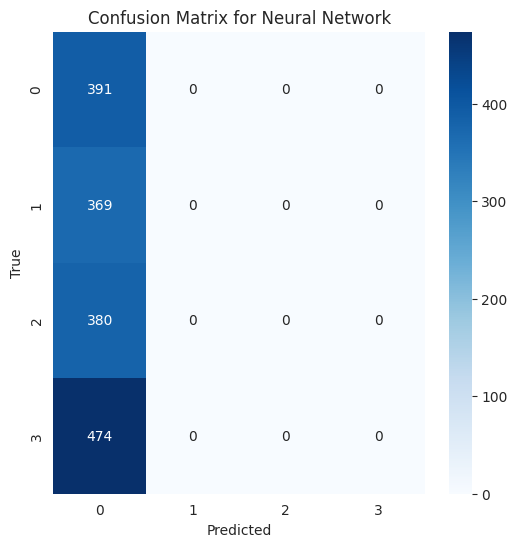

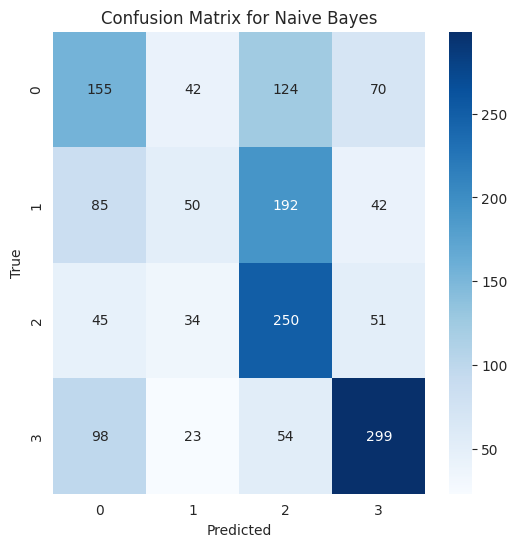

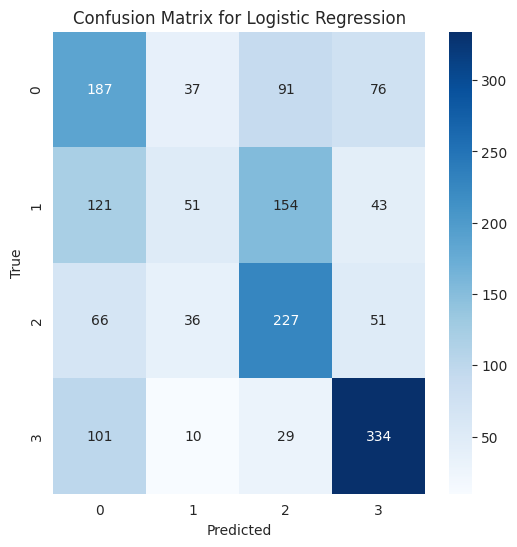

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Convert Neural Network predictions (probabilities) to class labels (discrete)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)


plot_confusion_matrix(y_test, y_pred_nn_classes, 'Neural Network')
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression')


In [ ]:
from sklearn.metrics import classification_report


y_pred_nn_classes = y_pred_nn.argmax(axis=1)

# Classification reports for all models
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn_classes))

# Naive Bayes Classification Report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Logistic Regression Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.24      1.00      0.39       391
           1       0.00      0.00      0.00       369
           2       0.00      0.00      0.00       380
           3       0.00      0.00      0.00       474

    accuracy                           0.24      1614
   macro avg       0.06      0.25      0.10      1614
weighted avg       0.06      0.24      0.09      1614

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       391
           1       0.34      0.14      0.19       369
           2       0.40      0.66      0.50       380
           3       0.65      0.63      0.64       474

    accuracy                           0.47      1614
   macro avg       0.45      0.46      0.43      1614
weighted avg       0.46      0.47      0.45      1614

Logistic Regression Classification Report:
              

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


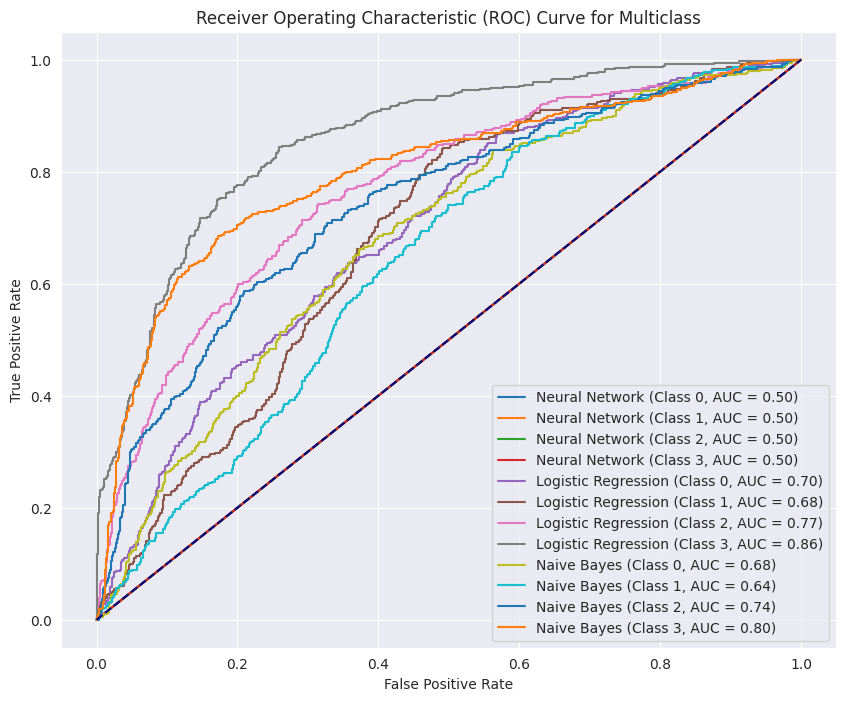

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarize y_test (one-hot encoding)


assert not np.isnan(X_test_scaled).any(), "X_test_scaled contains NaNs!"

y_pred_nn_prob = np.nan_to_num(model.predict(X_test_scaled))  # Assuming your NN model gives probabilities


y_pred_log_reg_prob = np.nan_to_num(log_reg_model.predict_proba(X_test_scaled))


y_pred_nb_prob = np.nan_to_num(nb_model.predict_proba(X_test_scaled))


fpr_nn, tpr_nn, roc_auc_nn = {}, {}, {}
fpr_log_reg, tpr_log_reg, roc_auc_log_reg = {}, {}, {}
fpr_nb, tpr_nb, roc_auc_nb = {}, {}, {}

for i in range(y_test_bin.shape[1]):
    fpr_nn[i], tpr_nn[i], _ = roc_curve(y_test_bin[:, i], y_pred_nn_prob[:, i])
    roc_auc_nn[i] = auc(fpr_nn[i], tpr_nn[i])

    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_bin[:, i], y_pred_log_reg_prob[:, i])
    roc_auc_log_reg[i] = auc(fpr_log_reg[i], tpr_log_reg[i])

    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin[:, i], y_pred_nb_prob[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])


plt.figure(figsize=(10, 8))

# Plot ROC curves for each class for Neural Network
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr_nn[i], tpr_nn[i], label=f'Neural Network (Class {i}, AUC = {roc_auc_nn[i]:.2f})')

# Plot ROC curves for each class for Logistic Regression
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], label=f'Logistic Regression (Class {i}, AUC = {roc_auc_log_reg[i]:.2f})')

# Plot ROC curves for each class for Naive Bayes
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr_nb[i], tpr_nb[i], label=f'Naive Bayes (Class {i}, AUC = {roc_auc_nb[i]:.2f})')

# Add the diagonal line for reference (no discrimination)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


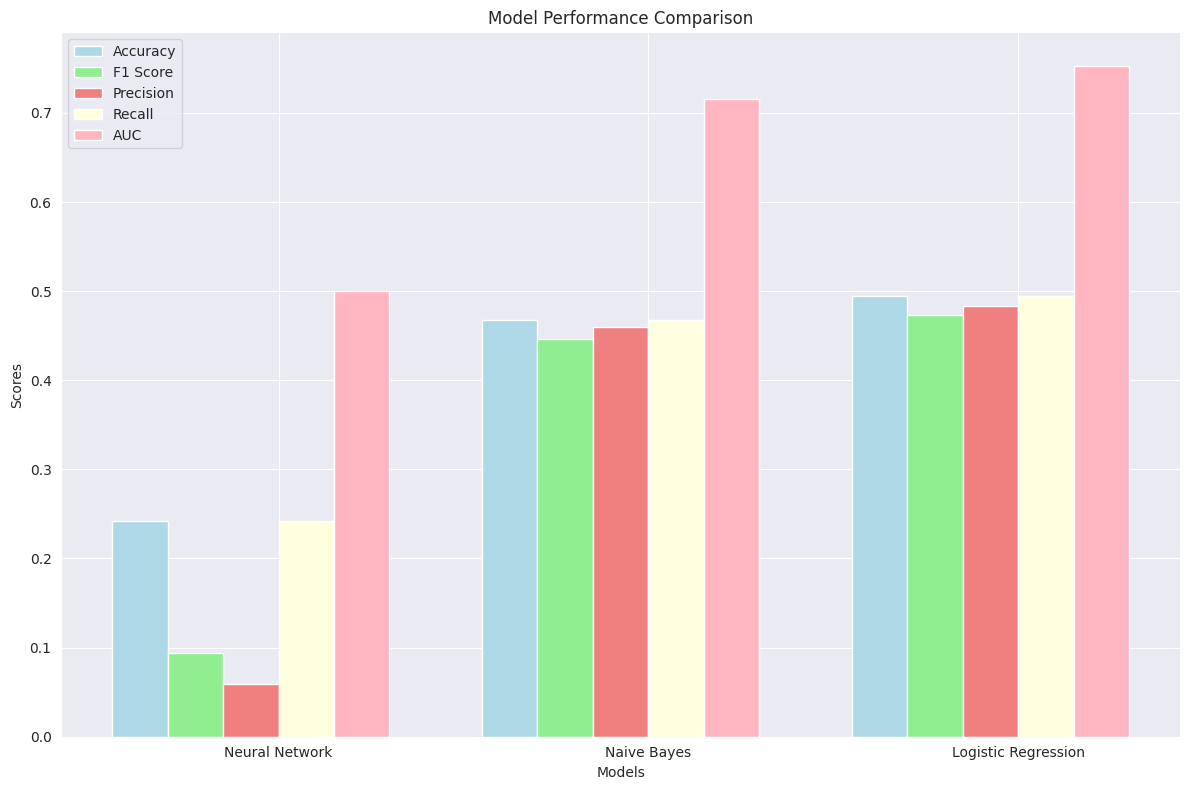

The best model based on F1-score is: Logistic Regression


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Store metrics for each model
models = ['Neural Network', 'Naive Bayes', 'Logistic Regression']
accuracy = []
f1 = []
precision = []
recall = []
roc_auc = []

# Neural Network
accuracy.append(accuracy_score(y_test, y_pred_nn_classes))
f1.append(f1_score(y_test, y_pred_nn_classes, average='weighted'))
precision.append(precision_score(y_test, y_pred_nn_classes, average='weighted'))
recall.append(recall_score(y_test, y_pred_nn_classes, average='weighted'))
roc_auc.append(roc_auc_score(y_test_bin, y_pred_nn_prob, average='macro', multi_class='ovr'))

# Naive Bayes
accuracy.append(accuracy_score(y_test, y_pred_nb))
f1.append(f1_score(y_test, y_pred_nb, average='weighted'))
precision.append(precision_score(y_test, y_pred_nb, average='weighted'))
recall.append(recall_score(y_test, y_pred_nb, average='weighted'))
roc_auc.append(roc_auc_score(y_test_bin, y_pred_nb_prob, average='macro', multi_class='ovr'))

# Logistic Regression
accuracy.append(accuracy_score(y_test, y_pred_log_reg))
f1.append(f1_score(y_test, y_pred_log_reg, average='weighted'))
precision.append(precision_score(y_test, y_pred_log_reg, average='weighted'))
recall.append(recall_score(y_test, y_pred_log_reg, average='weighted'))
roc_auc.append(roc_auc_score(y_test_bin, y_pred_log_reg_prob, average='macro', multi_class='ovr'))


x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 8))

# Accuracy Bar
ax.bar(x - 2.5 * width, accuracy, width, label='Accuracy', color='lightblue')

# F1 Score Bar
ax.bar(x - 1.5 * width, f1, width, label='F1 Score', color='lightgreen')

# Precision Bar
ax.bar(x - 0.5 * width, precision, width, label='Precision', color='lightcoral')

# Recall Bar
ax.bar(x + 0.5 * width, recall, width, label='Recall', color='lightyellow')

# ROC AUC Bar
ax.bar(x + 1.5 * width, roc_auc, width, label='AUC', color='lightpink')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

# Now compare the best model based on F1-score or AUC
best_model_index = np.argmax(f1)
best_model = models[best_model_index]
print(f"The best model based on F1-score is: {best_model}")
